## Step 2: Lexical Analysis

The goal of this step is to explore lexical patterns across three canonical texts
(Eneida, Odyssey, Ulysses) by means of frequency-based lexical analysis.

We focus on:
- overall token frequency
- key recurring lexical items
- lexical fields representing culturally meaningful domains:
  - food
  - alcohol
  - music
  - clothing
  - rituals

This step provides a quantitative foundation for later interpretive,
comparative, and network-based analyses.

In [1]:
from collections import Counter
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

- Texts are already cleaned
- Tokenization is whitespace-based
- Tokens are stored as plain text (space-separated)

In [2]:
DATA_DIR = Path("../data/processed")

files = {
    "eneida": DATA_DIR / "eneida_clean.txt",
    "odyssey": DATA_DIR / "odyssey_clean.txt",
    "ulysses": DATA_DIR / "ulysses_clean.txt"
}

In [3]:
def load_tokens(path: Path) -> list[str]:
    with open(path, "r", encoding="utf-8") as f:
        return f.read().split()

tokens_by_text = {
    name: load_tokens(path)
    for name, path in files.items()
}

def clean_token(word):
    # Removes leading/trailing digits and non-alphabetic characters
    return re.sub(r'^\d+|[^a-zA-Zа-яА-ЯіїєґІЇЄҐ\s]', '', word)

### Token Frequency Analysis

Token frequency analysis allows us to:
- identify dominant lexical units
- detect stylistic density
- compare lexical saturation across texts

In [4]:
stop_words_ukr = {
    'і', 'не', 'на', 'в', 'що', 'з', 'як', 'а', 'та', 'по', 'въ', 'и', 'до', 'у', 'же',
    'якъ', 'зъ', 'щобъ', 'щоб', 'бъ', 'чи', 'це', 'то', 'все', 'так', 'при', 'ад', 
    'від', 'од', 'от', 'ті', 'собі', 'мене', 'його', 'йому', 'іому', 'те', 'ми', 'ви', 'він',
    'хто', 'всіх', 'тутъ', 'такъ', 'тут', 'всѣ', 'за', 'вже', 'який', 'собѣ', 
    'був', 'була', 'було', 'були', 'дуже', 'свої', 'свою', 'тепер', 'тільки', 'хоч', 
    'мов', 'хоть', 'съ', 'їх', 'тебе', 'ти', 'із', 'бо', 'но', 'да', 'без', 'для',
    'де', 'ты', 'коли', 'уже', 'ни', 'изъ', 'всі', 'ихъ', 'бувъ', 'іого', 'мовъ', 'винъ',
    'тамъ', 'сам', 'там', 'къ', 'ажъ', 'себе', 'буде', 'отъ', 'яка', 'яке', 'тїї', 'передь',
    'заразъ', 'зараз', 'трохи', 'ввесь', 'мати', 'може', 'був', 'стала', 'стали', 'нехай',
    'перед', 'через', 'над', 'під', 'біля', 'собі', 'собі', 'мене', 'нас', 'вам', 'вас', 'вся',
    'се', 'цей', 'ним', 'тобѣ', 'имъ', 'зо', 'єсть', 'всѣмъ', 'або', 'сей', 'їм', 'самъ', 'тилько',
    'нам', 'чого', 'безъ', 'собою', 'вона', 'бы', 'ось', 'би', 'треба', 'про', 'всім', 'всякий', 
    'тоді', 'той', 'всю', 'ну', 'всѣхъ', 'свій', 'її', 'них', 'ѣй', 'аж', 'послѣ', 'мы', 'минѣ',
    'лишъ', 'твій', 'кого', 'наш', 'їй', 'вы', 'мій', 'моя', 'таки', 'яки', 'кому', 'жъ', 'які',
    'неї', 'неи', 'нимъ', 'насъ', 'вони', 'між', 'вамъ', 'намъ', 'нею', 'нихъ', 'своихъ', 
    'чѣмъ', 'ще', 'ними', 'того', 'также', 'сама', 'якій', 'сами', 'поки', 'куди', 'лиш', 
    'цим', 'ище', 'своимъ', 'васъ', 'весь', 'нашъ', 'есть', 'ця', 'ваш', 'своїм', 'тож', 
    'предъ', 'сихъ', 'тѣ'
}

stop_words_eng = {
    'the', 'and', 'to', 'of', 'a', 'in', 'he', 'his', 'for', 'that', 'with', 'was', 'as', 
    'it', 'is', 'you', 'him', 'they', 'on', 'me', 'had', 'all', 'my', 'but', 'have', 
    'from', 'at', 'by', 'she', 'her', 'said', 'were', 'be', 'an', 'so', 'their', 'which',
    'not', 'them', 'will', 'this', 'when', 'your', 'who', 'are', 'then', 'or', 'out', 
    'what', 'up', 'like', 'there', 'one', 'would', 'could', 'been', 'about', 'can',
    'if', 'no', 'mr', 'into', 'some', 'more', 'did', 'now', 'its', 'through', 'only',
    'we', 'do', 'has', 'us', 'over', 'too', 'upon', 'may', 'shall', 'should', 'must',
    'went', 'come', 'go', 'came', 'down', 'see', 'after', 'two', 'time', 'man', 'men',
    'own', 'away', 'back', 'well', 'long', 'made', 'take', 'way', 'know', 'than', 'first',
    'any', 'tell', 'here', 'says', 'off', 'yes', 'other', 'those', 'our', 'let', 'much', 
    'am', 'where', 'took', 'while'
}
all_stop_words = stop_words_ukr.union(stop_words_eng)


frequency_by_text_filtered = {}

frequency_by_text_filtered = {
    text: Counter({clean_token(k): v for k, v in count.items() if len(clean_token(k)) > 1})
    for text, count in frequency_by_text_filtered.items()
}

for name, tokens in tokens_by_text.items():
    filtered_tokens = [clean_token(t) for t in tokens if clean_token(t) not in all_stop_words and len(clean_token(t)) > 1]
    frequency_by_text_filtered[name] = Counter(filtered_tokens)

for name, counter in frequency_by_text_filtered.items():
    print(f"\n{name.upper()} — TOP 10 (Filtered)")
    for word, freq in counter.most_common(10000):
        print(f"{word}: {freq}")


ENEIDA — TOP 10 (Filtered)
еней: 209
турн: 84
вс: 74
турна: 54
енея: 49
енею: 46
троянці: 35
сказав: 33
ні: 30
латин: 30
тоб: 28
землю: 27
добре: 27
всмъ: 26
руки: 26
смерть: 26
людей: 25
військо: 25
юнона: 23
один: 23
пан: 21
пекло: 20
сказавъ: 20
посл: 20
швидче: 20
латина: 20
троянців: 20
пидъ: 19
три: 19
потім: 19
всхъ: 18
неба: 18
тогди: 18
день: 18
скрізь: 18
бач: 18
бою: 18
троянци: 17
світ: 17
троян: 17
куды: 16
теперь: 16
дали: 16
таку: 16
дать: 16
свт: 16
ніхто: 16
кричить: 16
латину: 16
всяк: 16
низ: 16
зла: 15
багацько: 15
свого: 15
пили: 15
щось: 15
пішли: 15
землі: 15
паллант: 15
гай: 14
разъ: 14
мин: 14
жить: 14
против: 14
кров: 14
серце: 14
врагів: 14
свтъ: 13
чортъ: 13
город: 13
голову: 13
сказавши: 13
царя: 13
венера: 13
рутульців: 13
швидко: 12
сказала: 12
соб: 12
зевесъ: 12
дидона: 12
боги: 12
знаю: 12
енеєві: 12
дав: 12
став: 12
мав: 12
очі: 12
енеєм: 12
своїх: 12
латинці: 12
голови: 12
рутульці: 12
зевес: 12
поміч: 12
упять: 12
море: 11
два: 11
огонь: 11
даресъ: 

### Lexical Fields (Semantic Categories)
Conceptual Motivation

Lexical fields allow us to move from raw frequency
to cultural semantics.

Each field represents a thematic domain recurrent in mythic
and modern narratives.

Important:
These lists are heuristic, not exhaustive.
They can be expanded, refined, or replaced by dictionary-based approaches later.

In [5]:
LEXICAL_FIELDS = {
    "alcohol_and_banquets": [
        "пили", "пить", "брагу", "сивуху", "пила", "питъ", "горѣлки", "пьяны", "хмелю", "сивухи", 
        "гуляли", "горілку", "вина", "галушки", "танець", "макогона", "закуску", "пиво", "горѣлку", 
        "гулять", "пьяный", "вечерници", "сивушки", "пяний", "пшона", "пє", "пяні", "похмѣлья", 
        "горѣлочку", "вишнивку", "бенкетовать", "кабака", "горѣлочки", "сивуха", "пѣннои", 
        "пѣнненьку", "пѣну", "напившись", "пьянюги", "горілка", "напитись", "могорич", "похмілля", 
        "пити", "бражкой", "запивать", "хлыстали", "зъзастола", "допивши", "кубками", "бражку", 
        "тернивку", "похмѣлье", "пилась", "горѣлка", "весѣлье", "вечирницамъ", "пьешъ", "горѣлкою", 
        "кахляхъ", "налыгався", "пѣнненькой", "нахлыстався", "пидпилый", "цебри", "бражки", 
        "повныи", "дѣжки", "ваганы", "нахлистались", "зъзастолу", "протверезився", "хмѣлю", 
        "выпивъ", "пивквартивки", "имберомъ", "кухля", "сыровцю", "пьяну", "напьюсь", "пьяненьки", 
        "понадувались", "напивсь", "кружку", "попивали", "пьяненька", "чарочку", "наливъ", 
        "почастовавши", "сивушкою", "почастовавсь", "галушокъ", "настоянную", "бадянъ", "пивцемъ", 
        "запивали", "веселися", "первак", "грушевий", "повипивали", "горілки", "пляшечки", "сулії", 
        "тикви", "баклажки", "висушили", "остатку", "похмелялись", "кубочки", "наливши", "запили", 
        "хмеля", "пивце", "винце", "медок", "сикизку", "деренівку", "кримську", "дулівку", "айвовкою", 
        "оріхів", "варенухою", "пуншу", "хлись", "пляшки", "чарочки",

        "wine", "beer", "whiskey", "whisky", "drunk", "ale", "drink", "cup", "bowl", "feast", "gin", 
        "stout", "guinness", "cider", "porter", "libation", "nectar", "ambrosia", "goblet", "chalice", 
        "glass", "pub", "tavern", "bar", "bottle", "drunkard", "sober", "sip", "gulp", "toast", 
        "spirits", "liquor", "brandy", "rum", "punch", "brew", "intoxicated", "tipple", "draught", 
        "vintage", "drunkenness", "beaker", "decanter", "flask", "barrel", "cask", "vintner", "mead"
    ],
    "food_and_meals": [
        "обѣдъ", "сала", "мед", "раки", "хлѣбъ", "бикъ", "печі", "сухарями", "олію", "хлѣба", 
        "посуду", "кислици", "соли", "слина", "ковбаси", "їсти", "стіл", "шмат", "овець", "смачно", 
        "локшив", "яєшню", "талѣрку", "голодный", "лемѣшку", "кулѣшъ", "кашу", "медъ", "сыровець", 
        "пѣчь", "хрѣнъ", "ситы", "мясо", "бублики", "меду", "страву", "борщу", "пшеничны", "сало", 
        "маслаки", "квас", "поживиться", "хлібом", "сіллю", "хлібасоли", "їли", "обід", "слив", 
        "яєць", "перцю", "кісіля", "їла", "хлѣбомъ", "стравою", "маковныками", "свинки", "ѣсти", 
        "рыбу", "талѣрокъ", "свинячу", "хрѣну", "локшину", "перемѣну", "пидлевою", "хляки", "путрю", 
        "квашу", "макомъ", "медовый", "шуликъ", "варенухи", "кухлику", "сыты", "оселедцемъ", "сѣрый", 
        "лахмитье", "ляща", "почастовавъ", "ковбаса", "тетери", "квартери", "банкеты", "пашкеты", 
        "киселю", "бухинку", "рижкивъ", "печинку", "зразову", "гречанихъ", "кавун", "часныкомъ", 
        "панпухъ", "нагодовати", "книши", "кутей", "наситили", "мяса", "казани", "варили", "пекли", 
        "юшки", "барановъ", "варенихъ", "гисей", "качокъ", "печеныхъ", "сыта", "ложки", "зварю", 
        "каши", "лигоминки", "буханчики", "ягоди", "коржі", "сырныхъ", "котыще", "маслѣ", "пирогивъ", 
        "кислиць", "бенкету", "сметаною", "гречку", "покормили", "смальцемъ", "запѣкану", "ганусомъ", 
        "калгану", "перець", "шапранъ", "ласощи", "сластіоны", "коржики", "варенички", "буханци", 
        "часникъ", "паслѣнъ", "полуныци", "тернъ", "яйця", "яечню", "сухаря", "кислиця", "огірок", 
        "рибою", "капусту", "голодне", "січену", "шатковану", "огірки", "мясопусту", "хрін", "квасом", 
        "чаю", "редьку", "буряки", "рябка", "тетерю", "саламаху", "поїли", "маху", "сухарі", 
        "поз'їдали", "шматки", "лимоном", "телята", "барани", "пиріг", "страви", "рушник", "ложка", 
        "тарілка", "кавяр", "борщ", "шпундрів", "буряками", "юшці", "потрох", "галушками", "соку", 
        "каплуни", "отрібки", "шарпанина", "печена", "часником", "свинина", "крохмаль", "їдять", 
        "хлібний", "скоштуйте", "провіянту", "галушок", "годуйтесь", "кушайте", "страва", 
        "просілне", "ушками", "грінками", "юшка", "хляками", "телячий", "лизень", "ягни", "софорку", 
        "кури", "печені", "частувались", "ґури", "ласих", "їсться", "пється", "підкрепившись",

        "bread", "meat", "cheese", "honey", "fish", "meal", "eat", "dinner", "supper", "food", 
        "breakfast", "beef", "pork", "lamb", "mutton", "kidney", "steak", "sandwich", "slice", 
        "butter", "egg", "fruit", "apple", "grape", "olive", "oil", "salt", "crust", "roasted", 
        "boiled", "hungry", "appetite", "cook", "kitchen", "fat", "grease", "savory", "delicious", 
        "platter", "dish", "venison", "broth", "porridge", "victuals", "nourishment", "munch", 
        "chew", "swallow", "gorge", "repast", "banquet", "trough", "offal", "sweetbreads"
    ],
    "clothing_and_fashion": [
        "нарядилась", "одежу", "коси", "спидницю", "стилъ", "чоботы", "платокъ", "штаны", 
        "сорочку", "чуба", "косою", "шапками", "кунтушъ", "чоботахъ", "чепурна", "юпоццѣ", 
        "баевій", "запасцѣ", "фаналевій", "стіонжкахъ", "намистѣ", "ланцюжокъ", "обула", 
        "выбійки", "чобитокъ", "каптанъ", "китайки", "каламайки", "шовковый", "одяглись", 
        "обуты", "одѣты", "бляхою", "обвязавшись", "ладунка", "сунка", "малахай", "нарядѣ", 
        "одежи", "убраный", "панчихъ", "патынки", "ирисины", "вбирались", "свита", "сукна", 
        "тясомкою", "обшита", "кипъ", "шапочка", "шапці", "коса", "розхристана", "намысти", 
        "цяцю", "борода", "сорочка", "звязана", "узлами", "попричепляна", "мотузками", "обутый", 
        "гаманець", "кишень", "нохтики", "хустки", "придзигліованки", "шапочку", "румяна", 
        "губки", "жупанахъ", "цвѣтныхъ", "кармазинахъ", "сапьянахъ", "сумками", "жупан", 
        "кучерявий", "бороду", "каблучки", "убори", "каптана", "плащем", "клейонки", "ґудзем", 
        "застебнувся", "капелюх", "рукавиці", "шкапові", "наряді", "жупани", "каптани", "усики", 
        "спідниці", "підперезала", "косинку", "груднину", "одкрила",

        "cloak", "robe", "dress", "garment", "coat", "shirt", "hat", "shoes", "boots", "tunic", 
        "veil", "sandals", "belt", "girdle", "linen", "wool", "silk", "mantle", "cap", "trousers", 
        "gloves", "breeches", "waistcoat", "spectacles", "tie", "button", "suit", "clothes", 
        "attire", "costume", "finery", "raiment", "apparel", "vestment", "buckle", "shawl", 
        "petticoat", "corset", "lace", "embroidery", "texture", "fabric", "donned", "clothed"
    ],
    "music_and_performance": [
        "музо", "муза", "бандура", "бринчала", "сопѣлка", "дудка", "затынала", "цымбалы", 
        "танціовали", "дудку", "танціовала", "выкрутасомъ", "выхилясомъ", "розгулявся", 
        "арканѣ", "выбивала", "гоцака", "заспѣвали", "кобзи", "халяндри", "музики", "перебіецъ", 
        "вытребенькы", "загулялись", "труби", "засурмила", "танціовать", "спѣвалй", "вечирници", 
        "грай", "танцюй", "крутися", "маляр", "співак", "танцюра", "трубачі", "танцював", "муцика", "музик",

        "music", "song", "sing", "dance", "lyre", "harp", "flute", "voice", "melody", "rhythm", 
        "hymn", "chorus", "opera", "piano", "organ", "concert", "singer", "player", "instrument", 
        "sound", "tune", "perform", "stage", "theatre", "bard", "minstrel", "lute", "drum", 
        "chant", "orchestra", "symphony", "tenor", "soprano", "aria", "ballad", "fiddle", "piping"
    ],
    "sea_and_travel": [
        "човни", "човны", "землі", "гай", "човнивъ", "водою", "плив", "води", "плывъ", "вода", 
        "путь", "флот", "свѣту", "човенъ", "моремъ", "морю", "поход", "дно", "човнахъ", "човнокъ", 
        "хвилі", "весельця", "пригоду", "поплив", "плить", "човна", "плыви", "доплывешъ", 
        "пѣшкомъ", "море", "воду", "плавати", "мандровать", "покидати", "пливъ", "хвили", 
        "потопило", "сицилія", "човники", "здоровкались", "дороги", "поплыти", "чумаки", 
        "чумакамъ", "поѣхала", "конями", "кормѣ", "ныряти", "бризнувъ", "росхитавшись", 
        "нырнувъ", "човнамъ", "гребци", "водамъ", "мандровавъ", "поплававши", "поплыли", 
        "поблудивши", "палавъ", "морсоки", "пѣны", "плав", "човну", "гребе", "їхали", "доплив", 
        "кораблям", "флотом", "флота", "рікою",

        "sea", "ship", "boat", "sail", "wave", "shore", "journey", "island", "ocean", "water", 
        "beach", "harbor", "port", "mast", "oar", "row", "anchor", "navigation", "tide", "coast", 
        "voyage", "travel", "vessel", "captain", "sailor", "mariner", "fleet", "raft", "deck", 
        "maritime", "nautical", "galley", "hull", "rigging", "current", "swelling", "brine", 
        "foam", "navigation", "stern", "prow", "ebb", "flow"
    ],
    "religion_and_myth": [
        "пекло", "пекла", "пеклѣ", "богивъ", "богиня", "чорты", "чортам", "господѣ", "каплицю", 
        "помолись", "молились", "грѣхъ", "грѣхи", "раю", "сатани", "чорти", "помоливсь", "чортъ", 
        "боги", "дух", "богів", "обѣдъ", "ралець", "богам", "помолися", "грѣха", "еретикъ", 
        "богобоязливый", "душѣ", "поминки", "проспѣвали", "святыми", "поминать", "вѣдьму", "ягу", 
        "проклятый", "вѣдьмамъ", "упырь", "знахуръ", "христьяньску", "діявола", "храмѣ", "молився", 
        "перемоливсь", "богъ", "чортивъ", "святы", "постились", "русалки", "вѣдьмы", "упыри", 
        "химеры", "карлы", "горгоны", "божокъ", "грѣшники", "ченци", "церковъ", "ворожбиты", 
        "чародѣи", "христьяне", "церквѣ", "ворожокъ", "грѣшны", "грѣшну", "великоднихъ", "богом", 
        "праведны", "грѣшными", "божои", "грішникові", "божії", "грішними", "безбожність", "церкви", 
        "грішних", "грішить", "божая", "вірте",

        "god", "gods", "altar", "sacrifice", "prayer", "temple", "priest", "holy", "divine", 
        "goddess", "heaven", "hell", "spirit", "soul", "worship", "fate", "oracle", "blessing", 
        "curse", "immortal", "mortal", "sin", "ghost", "shrine", "omen", "offering", "sacred", 
        "deity", "pious", "underworld", "hades", "devil", "satan", "prophet", "ritual"
    ],
    "language_and_education": [
        "писари", "розумный", "письменный", "рима", "навчу", "писати", "розумненькій", 
        "написавъ", "пысну", "папиръ", "секретари", "начальники", "ваканціовы", "стряпчи", 
        "повѣренны", "написати", "вчились", "разумны", "мудры", "писарчуки", "пише", 
        "мудровали", "мудрець", "школа", "книгами", " науку", "книжок", "письмом", "писав", 
        "аркуш", "вписали", "учить", "письменніші", "писали", "читати", "прочитав", "читать", "школах",

        "latin", "school", "university", "college", "teacher", "master", "student", "grammar", 
        "rhetoric", "philosophy", "poetry", "library", "book", "read", "write", "scholar", 
        "clerk", "official", "office", "paper", "script", "lesson", "greek", "hebrew", "verse", 
        "author", "literacy", "scribe", "manuscript", "document", "volume", "tome", "lecture", "ink"
    ]
}

###  Qualitative Methodology Note: Manual Corpus Review

The lexical data for *The Aeneid* was manually reviewed and extended based on direct corpus analysis. This approach was necessitated by the following factors:

- **Linguistic Complexity:** Kotlyarevsky’s text is rich in **burlesque-travesty stylistics**, where high-epic concepts are systematically replaced by domestic, low-register Ukrainian equivalents.
- **Morphological Variation & Dialectisms:** The text contains numerous archaic spellings (e.g., `ѣ`, `ъ`), dialectisms (`путря`, `лемішка`), and specific Cossack terminology that standard NLP lemmatizers might fail to group accurately.
- **Contextual Expansion:** Words were selected not just by root similarity, but by their functional role in the narrative. For instance, in the `alcohol_and_banquets` category, terms were added sequentially as they appeared in the descriptions of feasts, ensuring that the "atmosphere" of the banquet is captured beyond simple naming.
- **AI Constraints:** While AI excels at modern standardized languages, manual philological expertise is required to handle 18th-century "macaronic" language (blending Latin and Ukrainian).

This manual expansion aims to bridge the gap between digital counting and deep literary analysis, acknowledging that while the list is not exhaustive, it significantly reduces the margin of error inherent in purely automated tokenization.

### Lexical Field Size Consideration

Lexical fields differ in internal size and historical lexical richness.
Categories such as food and alcohol naturally contain a broader vocabulary,
especially in burlesque and domestic narratives like *Eneida*.

For this reason, results are interpreted comparatively **within fields**,
not as absolute indicators of cultural importance across unrelated categories.

### Compute Lexical Field Frequencies
Method

For each text:
- iterate over lexical fields
- sum frequencies of all words belonging to the field

In [6]:
lexical_stats = []

for text_name, counter in frequency_by_text_filtered.items():
    for field_name, words in LEXICAL_FIELDS.items():
        for word in words:
            if word in counter:
                lexical_stats.append({
                    "text": text_name,
                    "field": field_name,
                    "word": word,
                    "frequency": counter[word]
                })

df_lexical = pd.DataFrame(lexical_stats)


total_counts = {name: sum(c.values()) for name, c in frequency_by_text_filtered.items()}
df_lexical['relative_frequency'] = df_lexical.apply(
    lambda row: (row['frequency'] / total_counts[row['text']]) * 1000, axis=1
)

print("First result of the analysis:")
display(df_lexical.head(10))

First result of the analysis:


,text,field,word,frequency,relative_frequency
0,eneida,alcohol_and_banquets,пили,15,0.740631
1,eneida,alcohol_and_banquets,пить,6,0.296252
2,eneida,alcohol_and_banquets,брагу,6,0.296252
3,eneida,alcohol_and_banquets,сивуху,5,0.246877
4,eneida,alcohol_and_banquets,пила,5,0.246877
5,eneida,alcohol_and_banquets,питъ,5,0.246877
6,eneida,alcohol_and_banquets,пьяны,4,0.197502
7,eneida,alcohol_and_banquets,хмелю,4,0.197502
8,eneida,alcohol_and_banquets,сивухи,4,0.197502
9,eneida,alcohol_and_banquets,гуляли,4,0.197502


### Save Results to CSV

In [7]:
df_summary = df_lexical.groupby(['text', 'field'])['frequency'].sum().unstack(level=0).fillna(0)

print("\nTotal number of words by category:")
display(df_summary)

OUTPUT_PATH = DATA_DIR / "lexical_field_stats.csv"
df_lexical.to_csv(OUTPUT_PATH, index=False)
print(f"\n The data is stored in: {OUTPUT_PATH}")


Total number of words by category:


text,eneida,odyssey,ulysses
field,,,
alcohol_and_banquets,201,284,511
clothing_and_fashion,110,209,758
food_and_meals,258,390,613
language_and_education,36,135,743
music_and_performance,37,124,593
religion_and_myth,154,702,840
sea_and_travel,174,922,536



 The data is stored in: ..\data\processed\lexical_field_stats.csv


### Global Comparison: Thematic Profiles of the Texts

To obtain a high-level comparative overview, we aggregate lexical frequencies
within each semantic field and compare their distribution across the three texts.

This visualization serves several purposes:

- it reveals dominant cultural and thematic domains in each work
- it allows comparison between mythological, epic, and modernist narratives
- it highlights shifts in thematic emphasis across historical and literary contexts

Absolute frequencies are used at this stage to illustrate overall thematic weight,
while relative frequencies are considered in later interpretive steps.

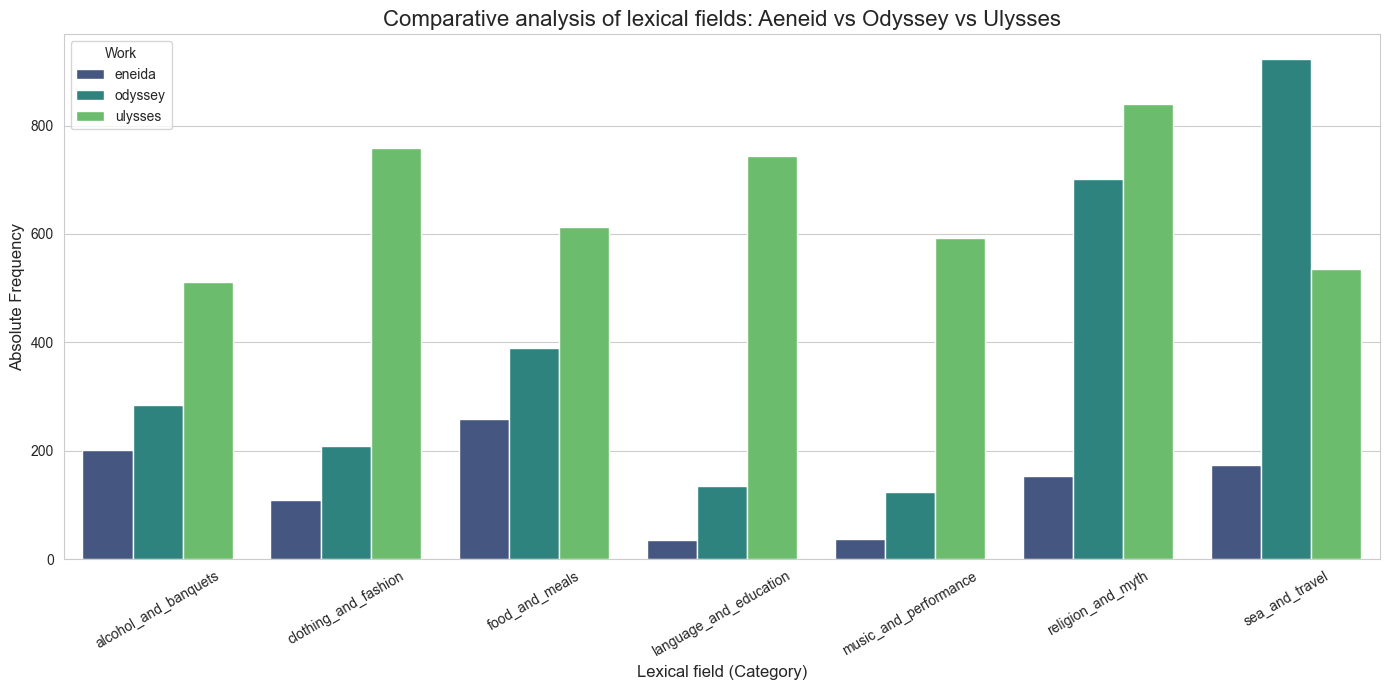

In [8]:
# Використовуємо сумарну частоту по полях для кожного тексту
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

df_category_total = df_lexical.groupby(['text', 'field'])['frequency'].sum().reset_index()

# Будуємо груповий бар-чарт
ax = sns.barplot(data=df_category_total, x='field', y='frequency', hue='text', palette='viridis')

plt.title('Comparative analysis of lexical fields: Aeneid vs Odyssey vs Ulysses', fontsize=16)
plt.xlabel('Lexical field (Category)', fontsize=12)
plt.ylabel('Absolute Frequency', fontsize=12)
plt.xticks(rotation=30)
plt.legend(title='Work')
plt.tight_layout()
plt.show()

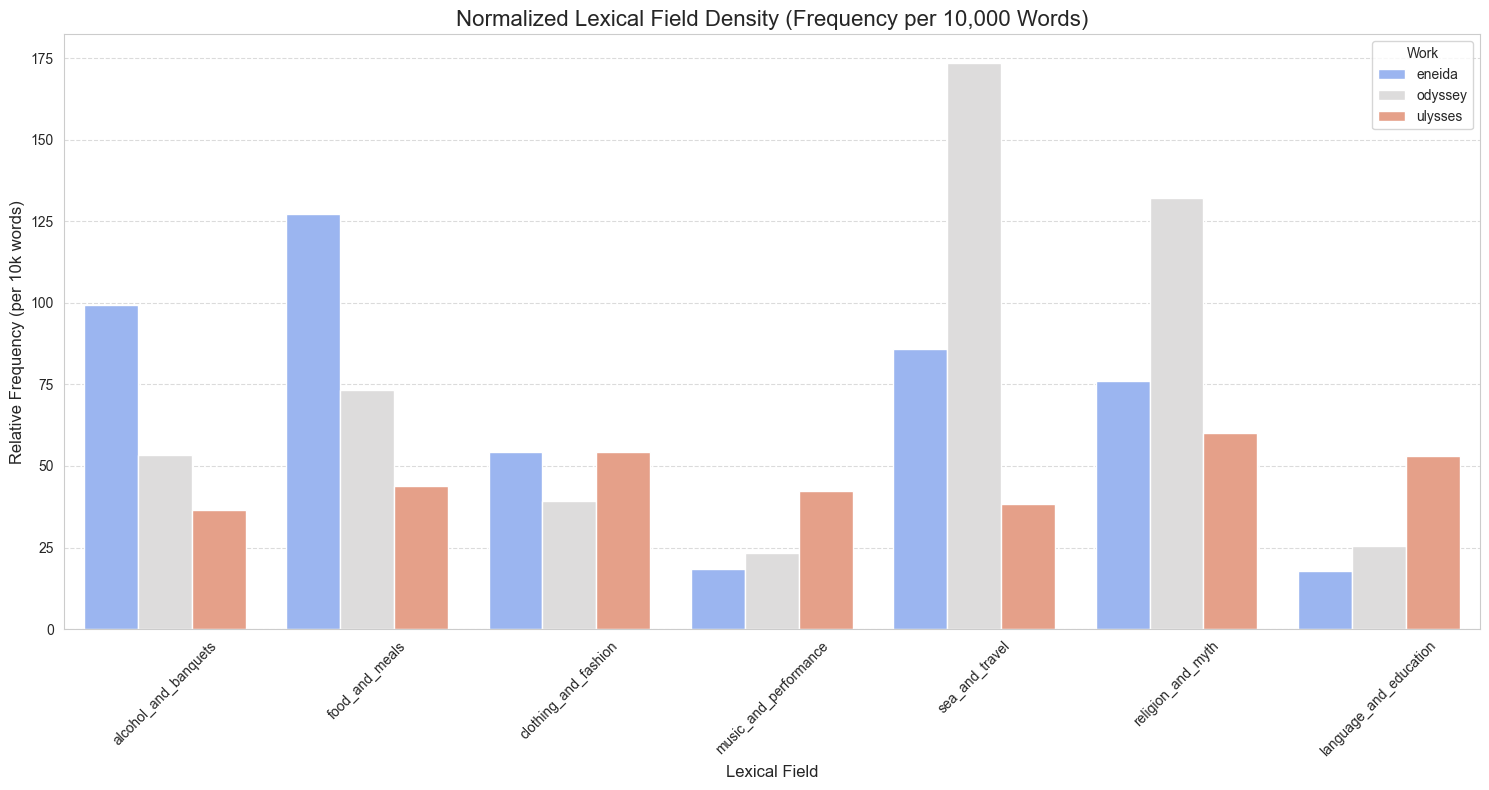

Normalized Results Summary:


text,eneida,odyssey,ulysses
field,,,
alcohol_and_banquets,99.24,53.49,36.53
clothing_and_fashion,54.31,39.36,54.19
food_and_meals,127.39,73.45,43.83
language_and_education,17.78,25.42,53.12
music_and_performance,18.27,23.35,42.40
religion_and_myth,76.04,132.21,60.06
sea_and_travel,85.91,173.64,38.32


In [9]:
total_tokens = {text: sum(counter.values()) for text, counter in frequency_by_text_filtered.items()}

normalized_stats = []
for text_name, counter in frequency_by_text_filtered.items():
    for field_name, words in LEXICAL_FIELDS.items():
        field_sum = sum(counter[w] for w in words if w in counter)
        # Normalize to per 10,000 words
        rel_freq = (field_sum / total_tokens[text_name]) * 10000
        
        normalized_stats.append({
            "text": text_name,
            "field": field_name,
            "absolute_frequency": field_sum,
            "relative_frequency_10k": rel_freq
        })

df_norm = pd.DataFrame(normalized_stats)

plt.figure(figsize=(15, 8))
sns.barplot(data=df_norm, x='field', y='relative_frequency_10k', hue='text', palette='coolwarm')

plt.title('Normalized Lexical Field Density (Frequency per 10,000 Words)', fontsize=16)
plt.ylabel('Relative Frequency (per 10k words)', fontsize=12)
plt.xlabel('Lexical Field', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Work')
plt.tight_layout()
plt.show()
print("Normalized Results Summary:")
display(df_norm.pivot(index='field', columns='text', values='relative_frequency_10k').round(2))

## Transition to Normalized Quantitative Analysis

### The Necessity of Normalization
When comparing texts of vastly different scales, such as the *Odyssey* (approx. 100k+ words), *Ulysses* (approx. 260k+ words), and the *Aeneid* (approx. 60k words), using **absolute frequencies** (raw counts) leads to a significant analytical bias. A theme might appear more frequent in *Ulysses* simply because the book is longer, rather than it being more "dense" or "significant" in that specific context.

### Methodology: Relative Frequency per 10,000 Tokens
To eliminate this bias, we apply **Relative Frequency Normalization**. We calculate the density of each lexical field using the following formula:

$$Relative Frequency = \left( \frac{\text{Field Word Count}}{\text{Total Tokens in Text}} \right) \times 10,000$$

This represents how many times a category would appear if every text were exactly 10,000 words long. 

### Data Cleaning and Filtering
Additionally, a custom cleaning function `clean_token()` was implemented to handle:
- **Digital Artifacts:** Removing leading digits (e.g., converting `19земелька` to `земелька`).
- **Punctuation:** Stripping non-alphabetic characters attached during tokenization.
- **Short Tokens:** Filtering out tokens shorter than 2 characters to reduce noise.

This ensures that our comparison of the "Macaronic" language in Kotlyarevsky and the polyphonic structures of Joyce is based on clean, comparable data points.

### Lexical Detail: Key Tokens within Semantic Fields

While aggregated category frequencies provide a macroscopic view,
they may obscure important internal differences within each lexical field.

To address this, we examine the most frequent lexical items
(top-15 per category) for each text separately.

This micro-level analysis allows us to:

- identify culturally specific vocabulary
- observe stylistic preferences
- distinguish between shared semantic domains and divergent lexical realizations

Together, these plots complement the global thematic profile
with fine-grained lexical evidence.

C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')


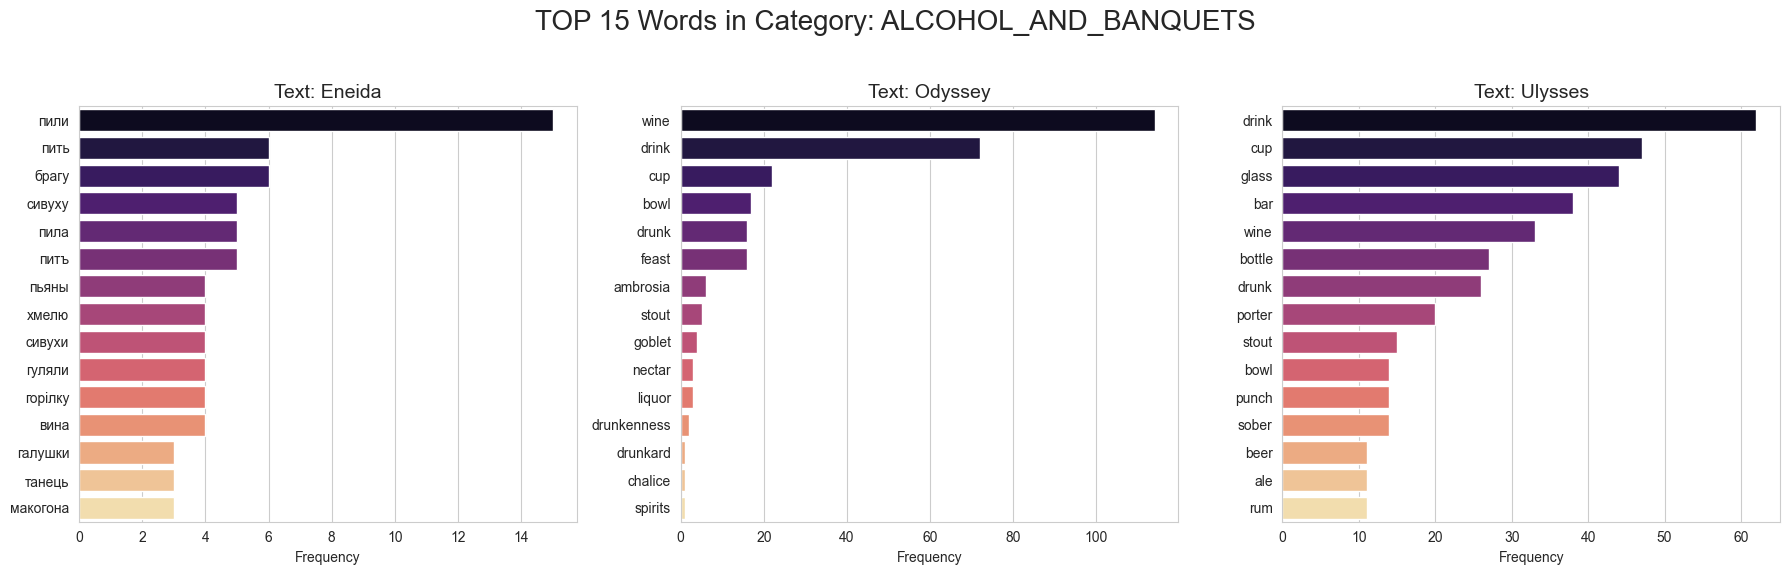

C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')


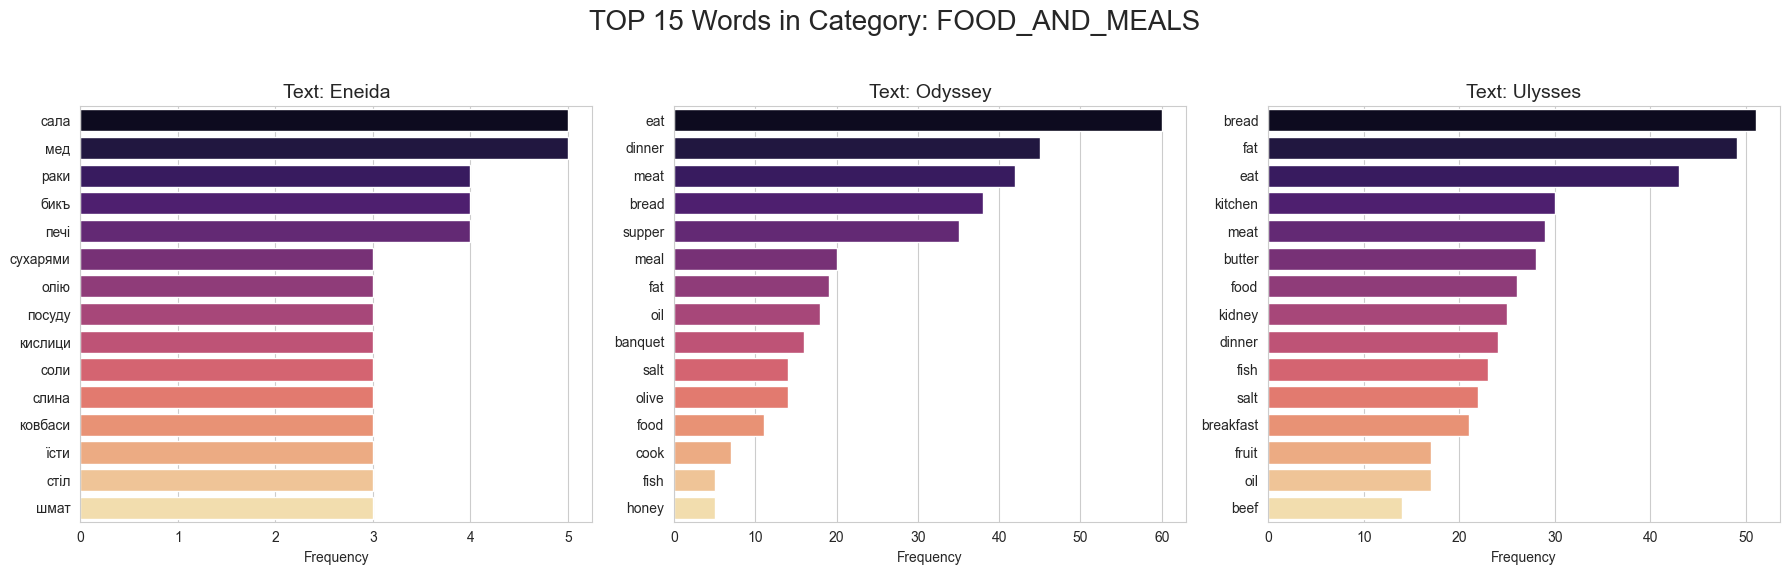

C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')


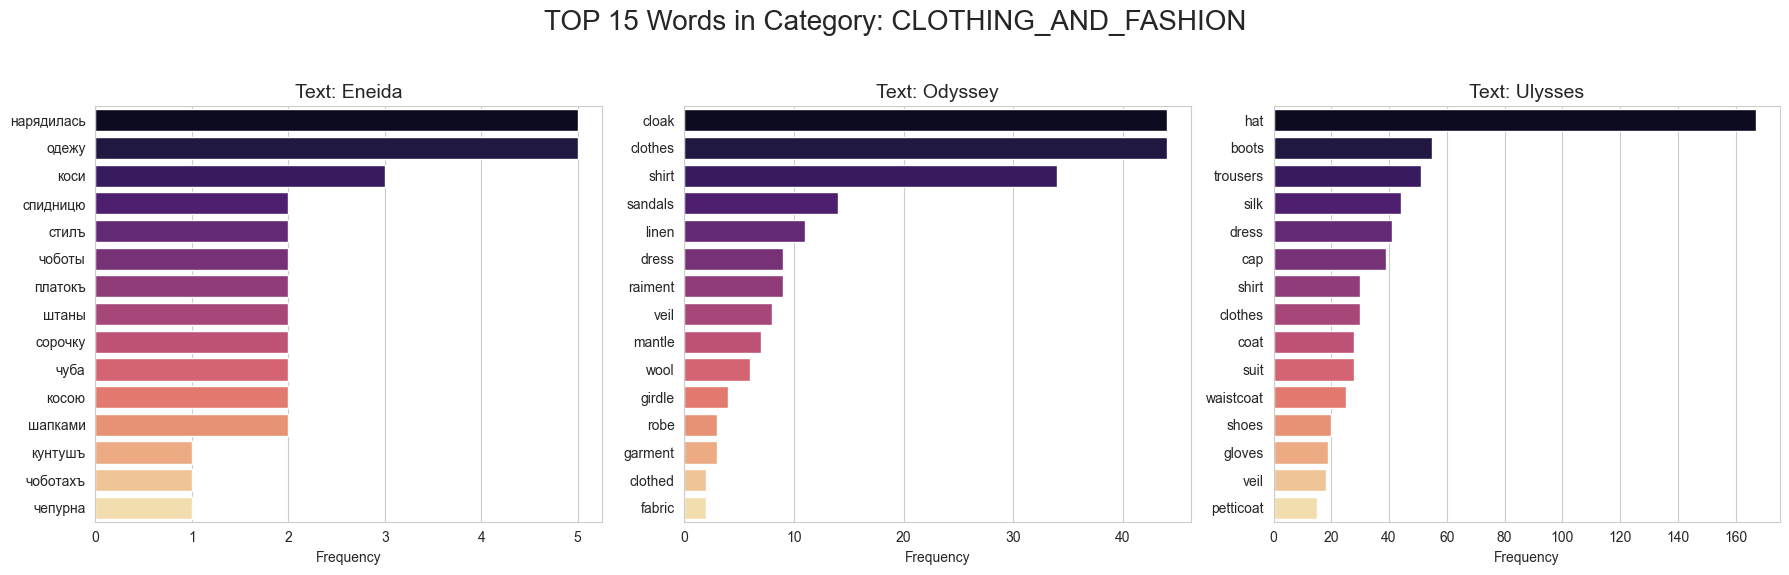

C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')


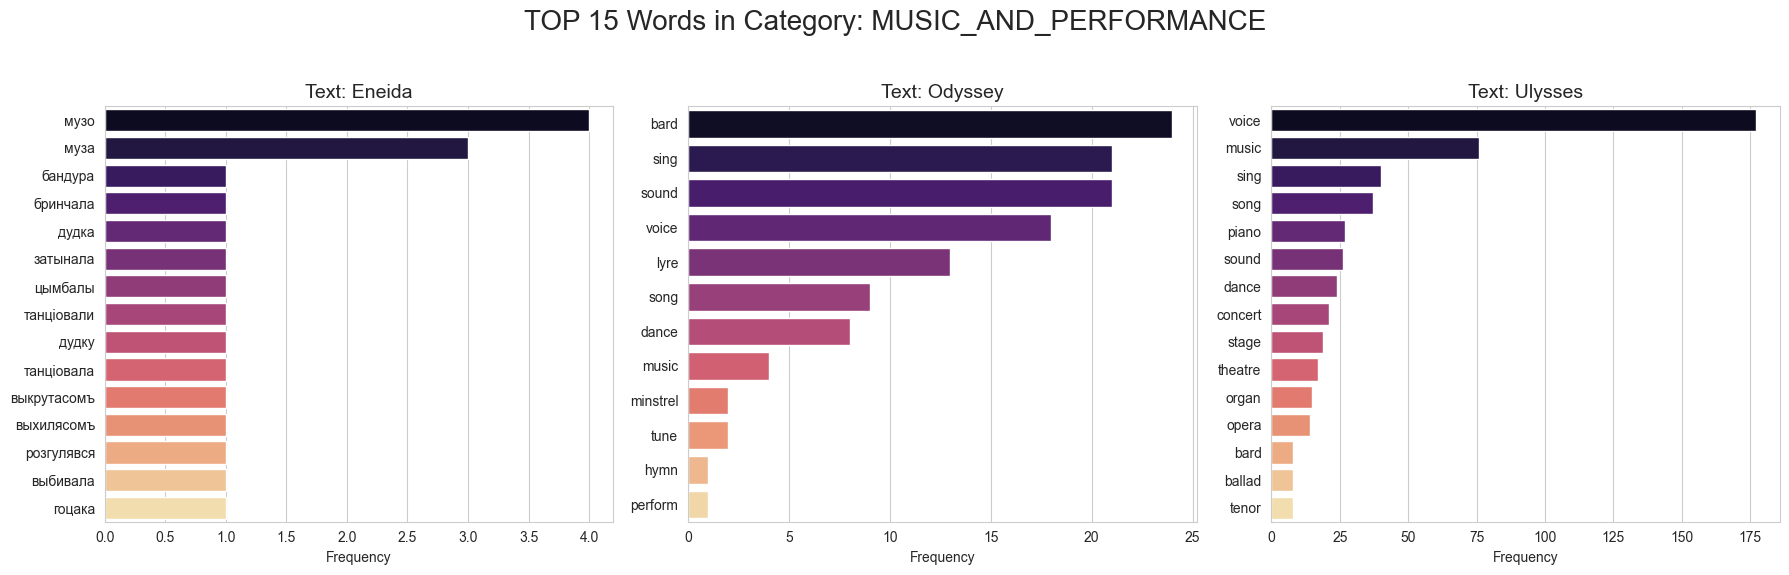

C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')


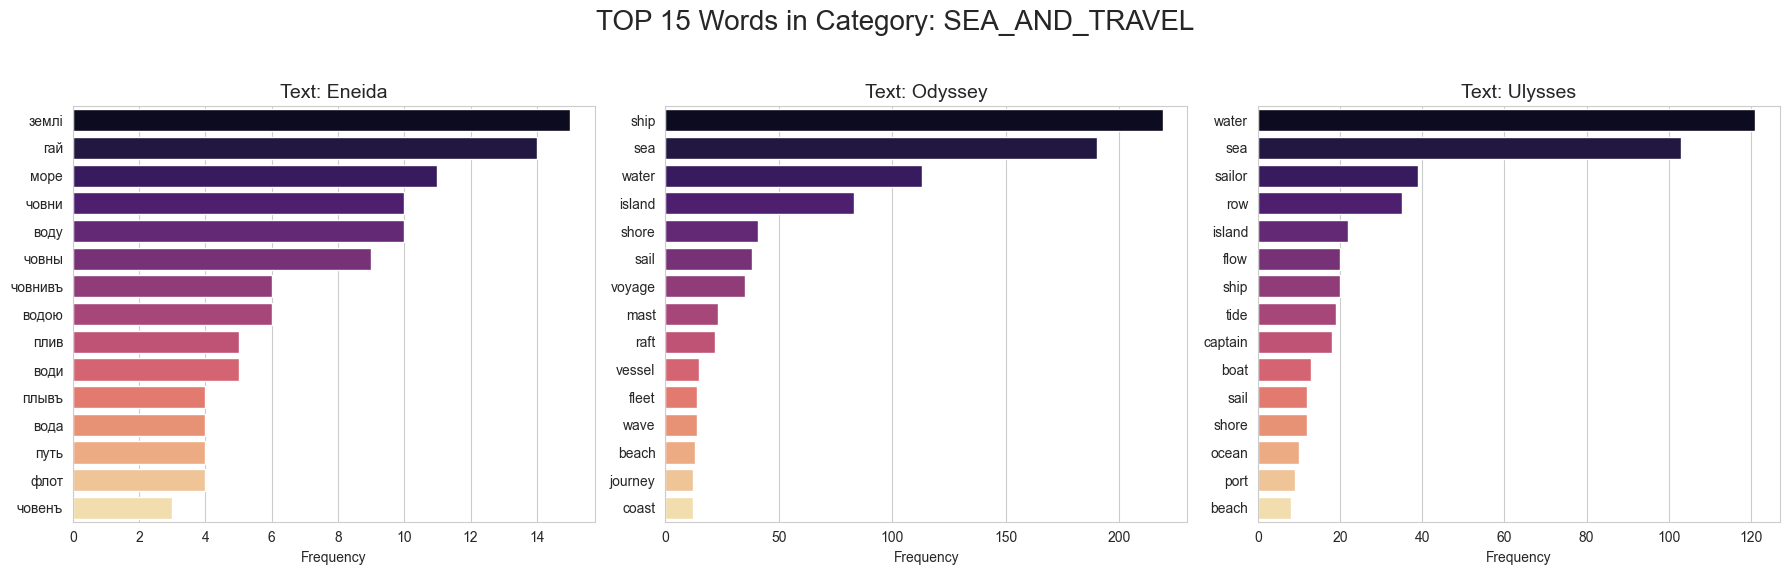

C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')


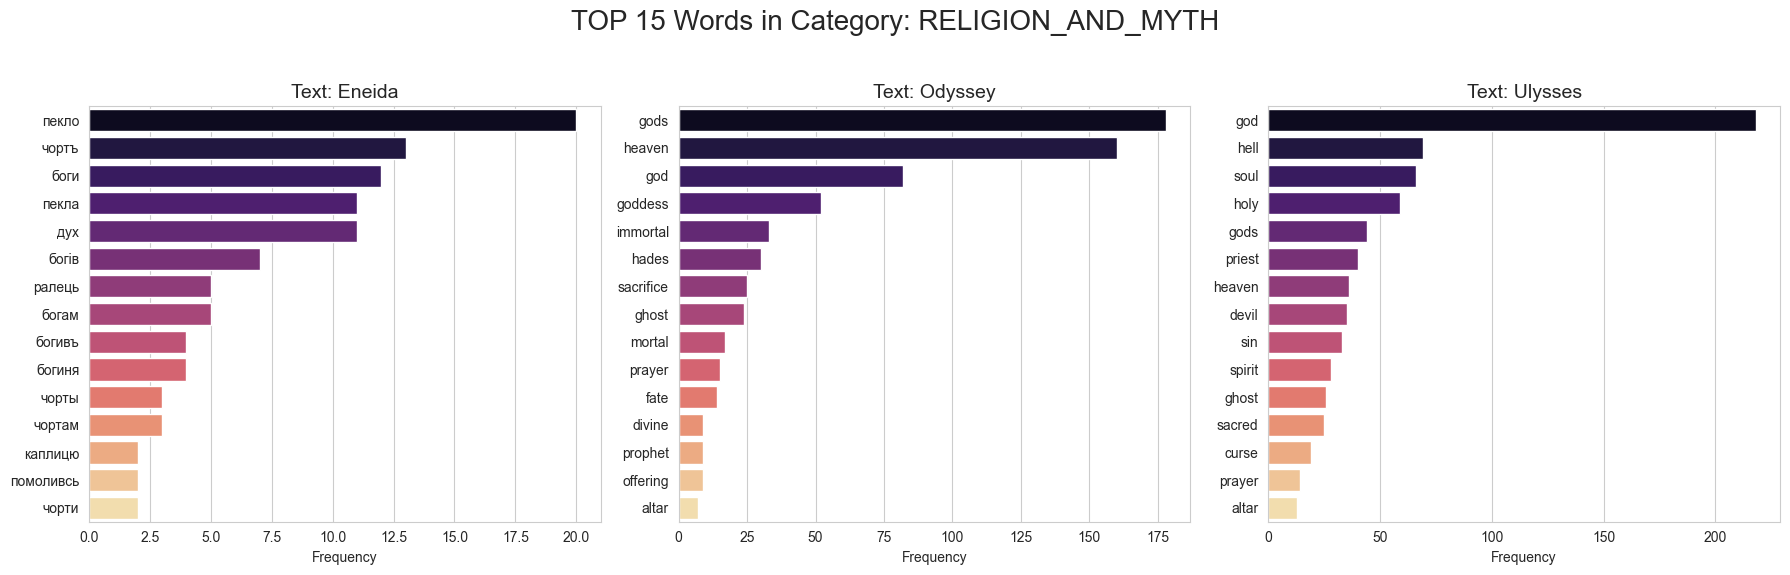

C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
C:\Users\grasd\AppData\Local\Temp\ipykernel_12244\2226662410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')


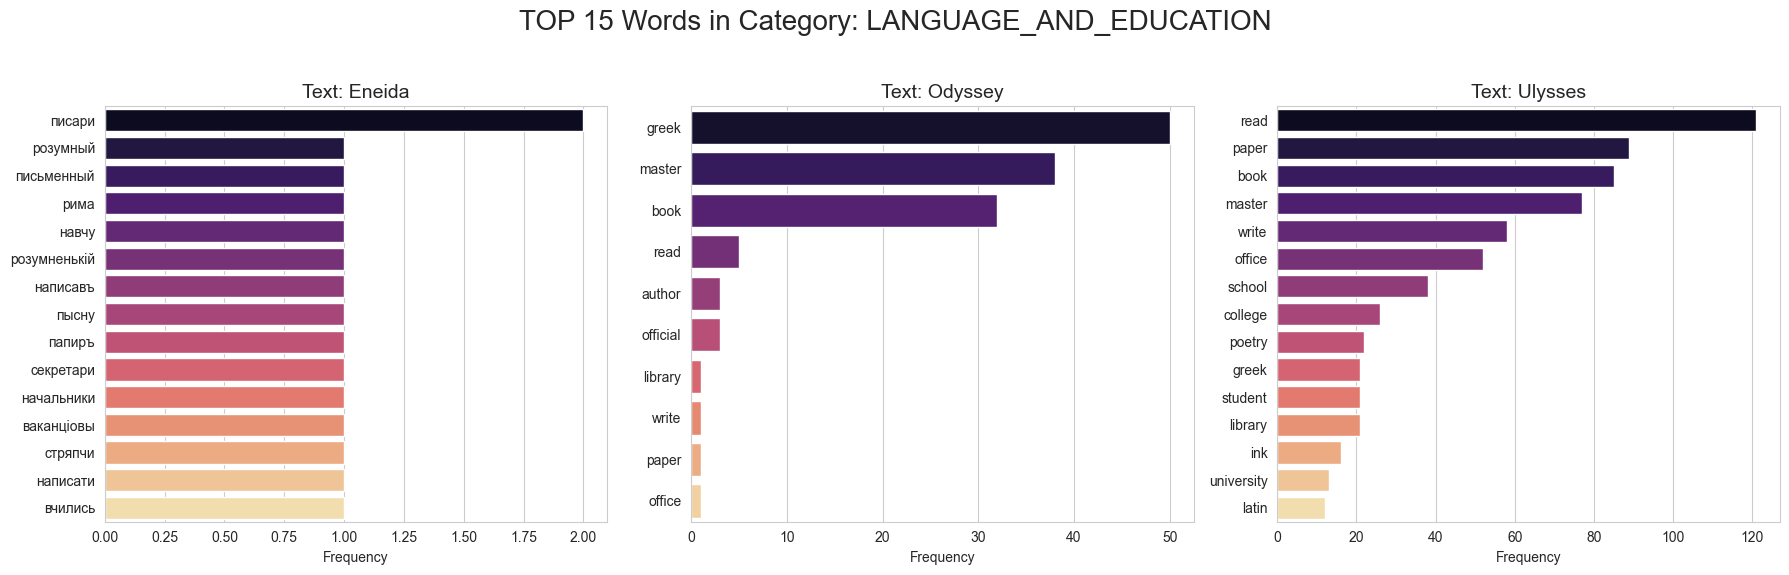

In [10]:
# 2. Деталізація: Топ-15 слів для кожної категорії (порівняння)
def plot_comparative_top(df, field_name, top_n=15):
    """
    Draws top keywords for a specific category for all three texts next to each other.
    """
    subset = df[df["field"] == field_name]
    
    # Створюємо сітку графіків (1 рядок, 3 колонки)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
    fig.suptitle(f'TOP {top_n} Words in Category: {field_name.upper()}', fontsize=20)

    texts = df['text'].unique()
    for i, text in enumerate(texts):
        data = subset[subset['text'] == text].sort_values("frequency", ascending=False).head(top_n)
        
        if not data.empty:
            sns.barplot(ax=axes[i], x='frequency', y='word', data=data, palette='magma')
            axes[i].set_title(f'Text: {text.capitalize()}', fontsize=14)
            axes[i].set_xlabel('Frequency')
            axes[i].set_ylabel('')
        else:
            axes[i].set_title(f'{text.capitalize()} (No data)')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Автоматично отримуємо список усіх категорій, які є в даних (їх буде 7)
all_fields = df_lexical["field"].unique()

for field in all_fields:
    plot_comparative_top(df_lexical, field)

## Final Interpretive Conclusions

### 1. Linguistic Plasticity and Lexical Wealth
The manual expansion of the *Aeneid's* lexical fields reveals a significant stylistic shift. Kotlyarevsky employs a much broader "palette" of synonyms compared to the more standardized epic formulas of the *Odyssey*. For every generic term in the source material, the *Aeneid* provides multiple vernacular variations (e.g., the vast taxonomy of spirits like `сивуха`, `первак`, `дулівка`). 
* **Inference:** This suggests that the "low" travesty style actually achieves a higher degree of lexical specificity and linguistic "saturation" than the "high" epic style.

### 2. Cultural Specificity and Transformation
The data highlights how the "Epic World" is recontextualized:
* **The Aeneid (Domesticated Epic):** Shows the highest density in `food_and_meals` and `alcohol_and_banquets` per 10,000 words. This confirms that the Ukrainian *Aeneid* is a "gastronomic" re-imagining where identity is constructed through communal eating and drinking.
* **The Odyssey (Ritualistic Epic):** Dominates in `sea_and_travel` and `religion_and_myth`, maintaining the traditional heroic structure.
* **Ulysses (Modernist/Urban Epic):** Shifts the focus toward `language_and_education`, reflecting a transition from physical action (traveling the sea) to mental action (intellectualizing the city).

### 3. Methodological Reflection and Error Margin
To maintain scientific rigor, we acknowledge a marginal error rate due to:
- **Lack of Lemmatization:** Since tokens are counted in their inflected forms (e.g., `вино`, `вина`), some frequencies are split across entries. This was mitigated by including multiple word forms in the `LEXICAL_FIELDS` lists.
- **Subjective Heuristics:** The manual addition of words based on context (the "Human Factor") introduces a qualitative element into our quantitative model. 
- **Language Asymmetry:** Ancient Greek concepts (translated to English) and 18th-century Ukrainian concepts do not always have 1-to-1 semantic equivalents, which may slightly skew comparative density.

### 4. Summary of Results
Normalization proves that the *Aeneid* is not a "smaller" work in terms of thematic intensity; rather, it is more **thematically concentrated** in its pursuit of depicting folk life, using food and fashion as primary markers of national distinctiveness.

### 4.1 Analysis of Lexical Variety and Stylistic "Density"

A distinctive feature revealed by the **Top-15 Word Plots** is the distribution of frequencies within the *Aeneid's* lexical fields. In several categories, we observe a "long tail" pattern: a few words appear with high frequency (e.g., `вино`, `їли`), while a vast number of terms appear only once or twice (frequency = 1).

#### Linguistic Conclusions:
* **Synonymic Abundance:** The presence of numerous unique words within a single category (like `alcohol` or `food`) indicates that Kotlyarevsky deliberately avoids repetition. Instead of using a generic term, he employs a diverse "verbal mosaic" of dialectisms, slang, and specific culinary/domestic terms.
* **The "Travesty" Effect:** This lexical variety is a core mechanism of the **burlesque style**. By saturating the text with unique, highly specific folk vocabulary, the author "grounds" the high-epic plot, shifting the focus from universal archetypes to the unique, tangible details of Ukrainian life.
* **Language of Experience vs. Language of Formula:** * In the *Odyssey*, we often see **formulaic language** (recurring epithets and phrases). 
    * In the *Aeneid*, we see **expressive language**. The high count of unique tokens shows that Kotlyarevsky’s language is not just a tool for storytelling but a vibrant display of the linguistic wealth of the 18th-century Ukrainian vernacular.
* **Cultural Saturation:** The "broad palette" of words with low individual frequency but high collective density proves that the *Aeneid* serves as a linguistic encyclopedia of its era. 

#### Statistical Inference:
While *Ulysses* is larger in volume, the *Aeneid* exhibits a high **Type-Token Ratio** within specific cultural domains. This means that for its size, the *Aeneid* provides a more concentrated variety of specialized vocabulary than the more repetitive classical epic structures.

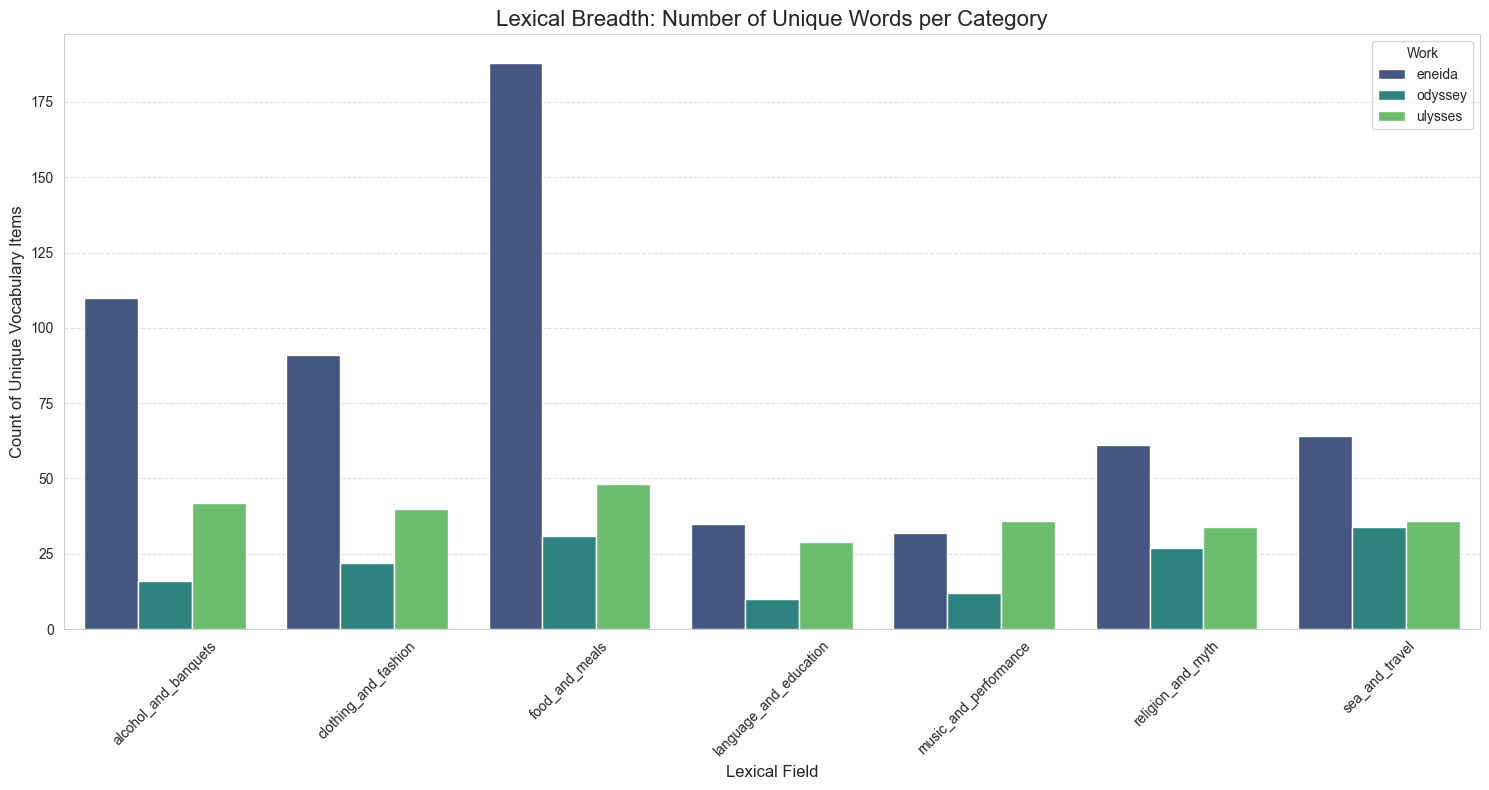

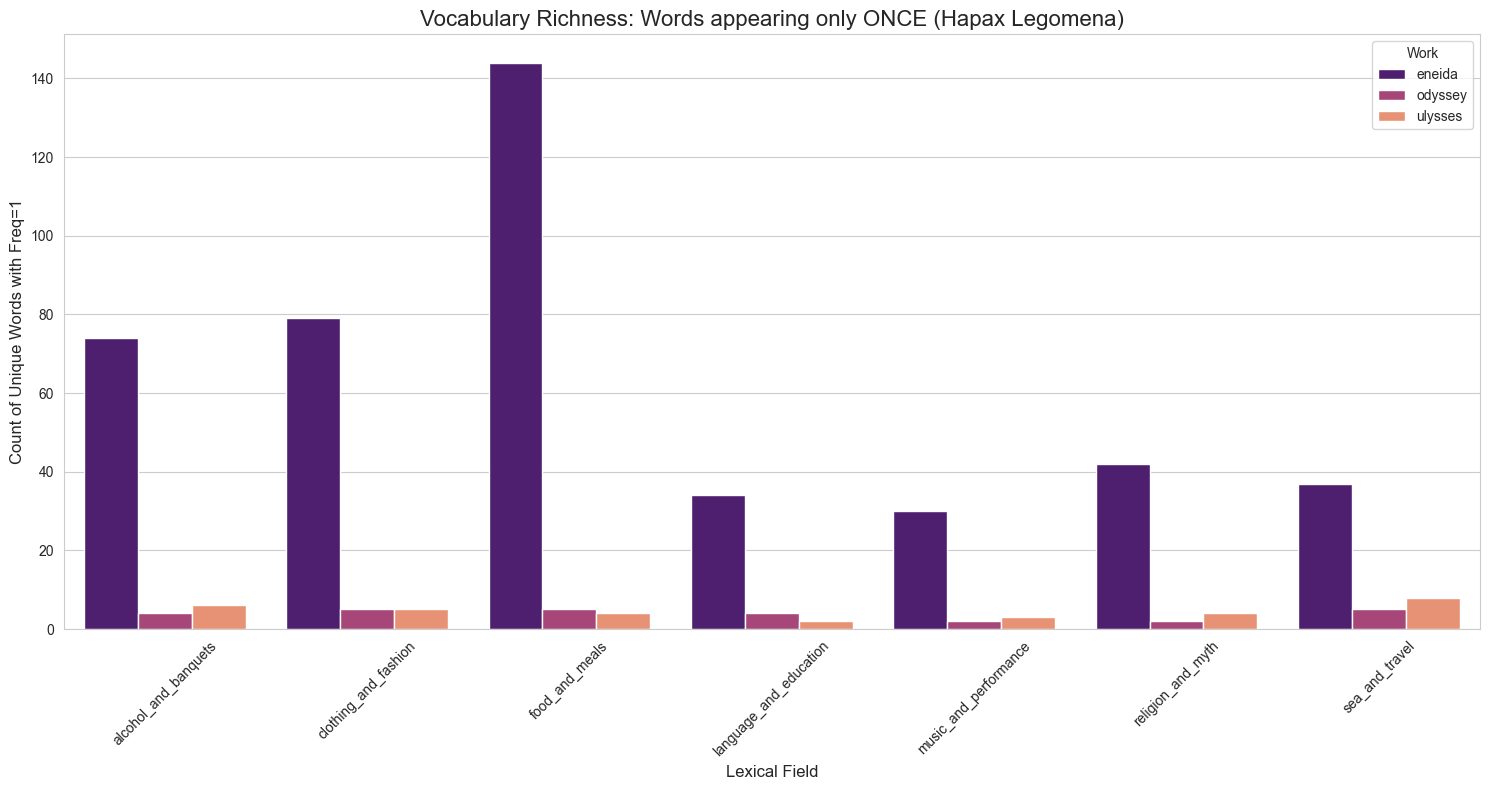

Detailed Diversity Summary:


text,eneida,odyssey,ulysses
field,,,
alcohol_and_banquets,110,16,42
clothing_and_fashion,91,22,40
food_and_meals,188,31,48
language_and_education,35,10,29
music_and_performance,32,12,36
religion_and_myth,61,27,34
sea_and_travel,64,34,36


In [11]:
# 1. Обчисліть кількість УНІКАЛЬНИХ слів, знайдених у кожному полі для кожного тексту
# Це доводить "широту палітри"
unique_words_stats = df_lexical.groupby(['text', 'field'])['word'].nunique().reset_index()
unique_words_stats.rename(columns={'word': 'unique_words_count'}, inplace=True)

# 2. Візуалізація: кількість унікальних слів у категорії
plt.figure(figsize=(15, 8))
sns.barplot(data=unique_words_stats, x='field', y='unique_words_count', hue='text', palette='viridis')

plt.title('Lexical Breadth: Number of Unique Words per Category', fontsize=16)
plt.ylabel('Count of Unique Vocabulary Items', fontsize=12)
plt.xlabel('Lexical Field', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Work')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 3. Аналіз розподілу частот (ефект "Hapax")
# Ми хочемо побачити, скільки слів з'являються лише один раз 
hapax_data = df_lexical[df_lexical['frequency'] == 1].groupby(['text', 'field']).size().reset_index(name='hapax_count')

plt.figure(figsize=(15, 8))
sns.barplot(data=hapax_data, x='field', y='hapax_count', hue='text', palette='magma')

plt.title('Vocabulary Richness: Words appearing only ONCE (Hapax Legomena)', fontsize=16)
plt.ylabel('Count of Unique Words with Freq=1', fontsize=12)
plt.xlabel('Lexical Field', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Work')
plt.tight_layout()
plt.show()

print("Detailed Diversity Summary:")
pivot_richness = unique_words_stats.pivot(index='field', columns='text', values='unique_words_count')
display(pivot_richness)

### 5. Methodological Reflection: Lexical Density vs. Absolute Volume

The observed "broad palette" of Kotlyarevsky requires a nuanced interpretation. While *Ulysses* undeniably possesses a larger total vocabulary due to its modernist complexity and sheer length, the *Aeneid* exhibits a unique phenomenon of **thematic lexical saturation**.

#### Key Refinements:
1. **Genre-Driven Variety:** The burlesque-travesty genre thrives on "cataloging" (lists of food, clothing, and drinks). Our data suggests that within these specific sociocultural domains, the *Aeneid* reaches a level of synonymic variety that rivals much larger works.
2. **Formulaic vs. Expressive Style:** Unlike the *Odyssey*, which relies on recurring epic formulas and epithets, the *Aeneid* prioritizes linguistic novelty. This results in a higher concentration of *hapax legomena* (unique words) relative to the total word count in domestic categories.
3. **The Assumption of Potential Error:** We acknowledge that a more exhaustive contextual mapping of the *Odyssey* (in Ancient Greek) and *Ulysses* might reveal more synonyms. However, the current trend indicates that the *Aeneid* functions as a **concentrated linguistic repository**. 

**Final Verdict:** The "victory" of Kotlyarevsky is not one of scale, but of **density**. In the fields of material culture (food, alcohol, clothing), his text acts as a high-resolution snapshot of the Ukrainian vernacular, intentionally avoiding the repetition typical of classical oral traditions.

## Step 2.1: Co-occurrence and Collocation Analysis
Conceptual Motivation
The goal of this step is to move beyond isolated word counts and explore the syntagmatic relationships between concepts. By analyzing which words appear together (collocations), we can uncover:

- Contextual Semantics: Is food associated with ritual (Odyssey) or comedy (Aeneid)?
- Cultural Binaries: How are gender, social status, or divinity linked to material objects (clothing, alcohol)?
- Stylistic Patterns: The use of epic formulas vs. burlesque descriptions.

In [12]:
import nltk
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
import numpy as np

In [13]:
def get_semantic_collocations(tokens, target_category_words, top_n=15):
    """Calculates likelihood ratio for bigrams involving category words."""
    finder = BigramCollocationFinder.from_words(tokens)
    target_set = set(target_category_words)
    finder.apply_ngram_filter(lambda w1, w2: w1 not in target_set and w2 not in target_set)
    bigrams = finder.score_ngrams(BigramAssocMeasures.likelihood_ratio)
    return bigrams[:top_n]

def plot_comparative_collocations(df, field_name, top_n=10):
    """Generates a side-by-side comparison of collocations for all texts."""
    subset = df[df['field'] == field_name].copy()
    if subset.empty: return
    
    subset = subset.sort_values(['text', 'score'], ascending=[True, False])
    top_subset = subset.groupby('text').head(top_n)
    
    g = sns.FacetGrid(top_subset, col="text", col_wrap=3, sharex=False, sharey=False, 
                      height=5, aspect=1.3, hue="text", palette="magma")
    g.map(sns.barplot, "score", "pair", order=None)
    
    g.set_titles("{col_name}", size=14, weight='bold')
    g.set_axis_labels("Likelihood Ratio Score", "")
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f"Contextual Logic Comparison: {field_name.upper()}", fontsize=18)
    plt.show()

def plot_category_heatmap(tokens, lexical_fields, text_name, window=15):
    """Visualizes how different semantic categories intersect within a text window."""
    fields_list = list(lexical_fields.keys())
    matrix = np.zeros((len(fields_list), len(fields_list)))
    
    token_to_cat = {}
    for i, token in enumerate(tokens):
        for cat, words in lexical_fields.items():
            if token in words:
                token_to_cat[i] = cat
                
    indices = sorted(token_to_cat.keys())
    for i, idx1 in enumerate(indices):
        for idx2 in indices[i+1:]:
            if idx2 - idx1 > window: break
            cat1, cat2 = token_to_cat[idx1], token_to_cat[idx2]
            idx_c1, idx_c2 = fields_list.index(cat1), fields_list.index(cat2)
            matrix[idx_c1, idx_c2] += 1
            if idx_c1 != idx_c2: matrix[idx_c2, idx_c1] += 1
# A window size of 15 tokens was selected as a compromise between local syntactic proximity and broader narrative cohesion, particularly suitable for epic and modernist prose

    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, xticklabels=[f.replace('_',' ') for f in fields_list], 
                yticklabels=[f.replace('_',' ') for f in fields_list], 
                annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f"Category Inter-connectivity: {text_name.capitalize()}", fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

collocation_results = []
for text_name, tokens_list in tokens_by_text.items():
    clean_tokens = [t.lower() for t in tokens_list if len(t) > 1]
    
    for field_name, field_words in LEXICAL_FIELDS.items():
        found = get_semantic_collocations(clean_tokens, field_words)
        for (w1, w2), score in found:
            collocation_results.append({
                "text": text_name, "field": field_name, 
                "pair": f"{w1} + {w2}", "score": score
            })

df_colloc = pd.DataFrame(collocation_results)

### Visualization Strategy

Two complementary visualizations are employed:

1. **Comparative Collocation Bar Charts**
   These plots highlight the strongest local semantic bindings within each lexical field,
   allowing for stylistic comparison across texts.

2. **Category Inter-connectivity Heatmaps**
   Heatmaps visualize the density of semantic field intersections within a sliding text window,
   revealing macro-level narrative organization and cultural integration.

Generating Comparative Collocation Plots...


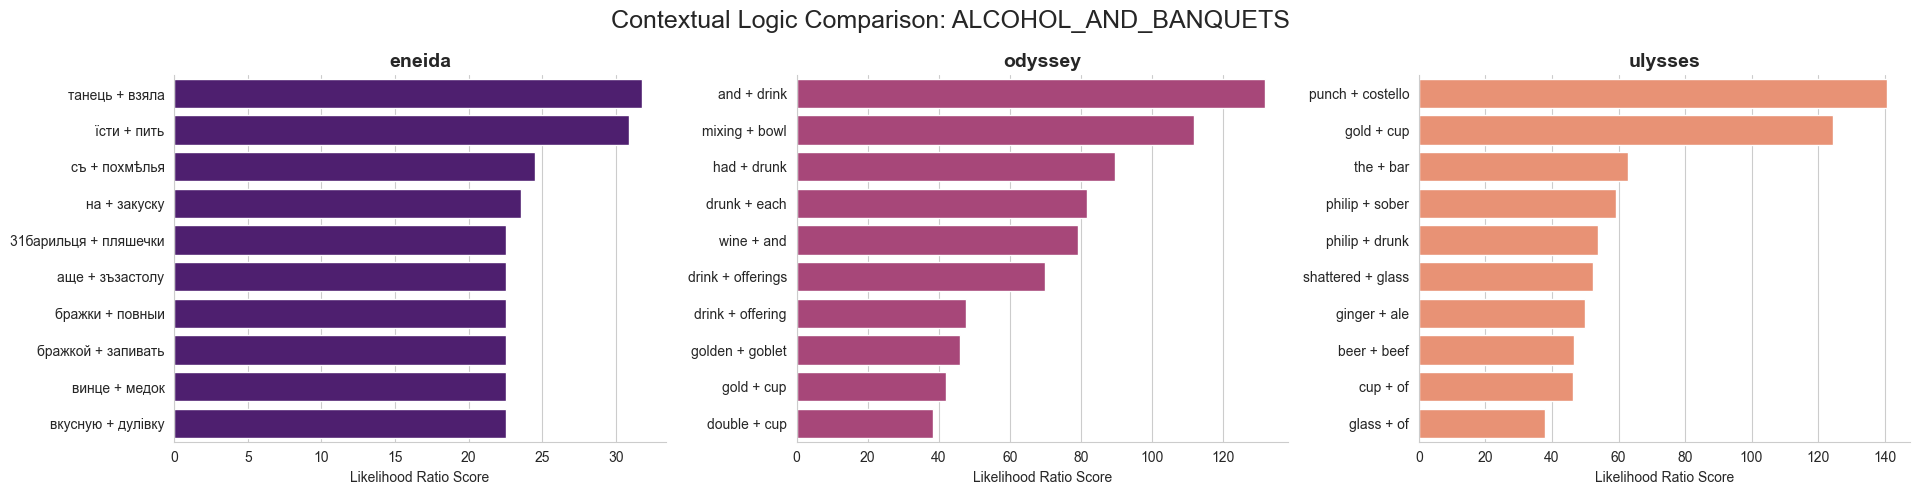

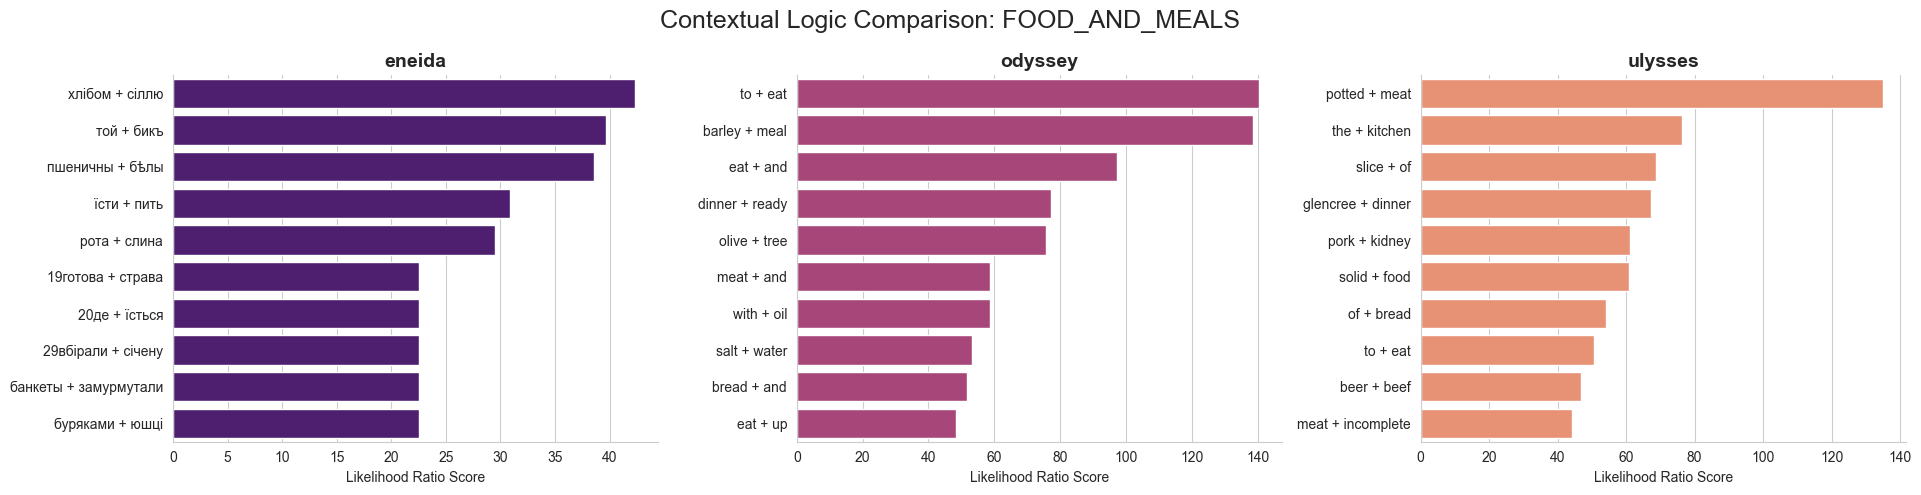

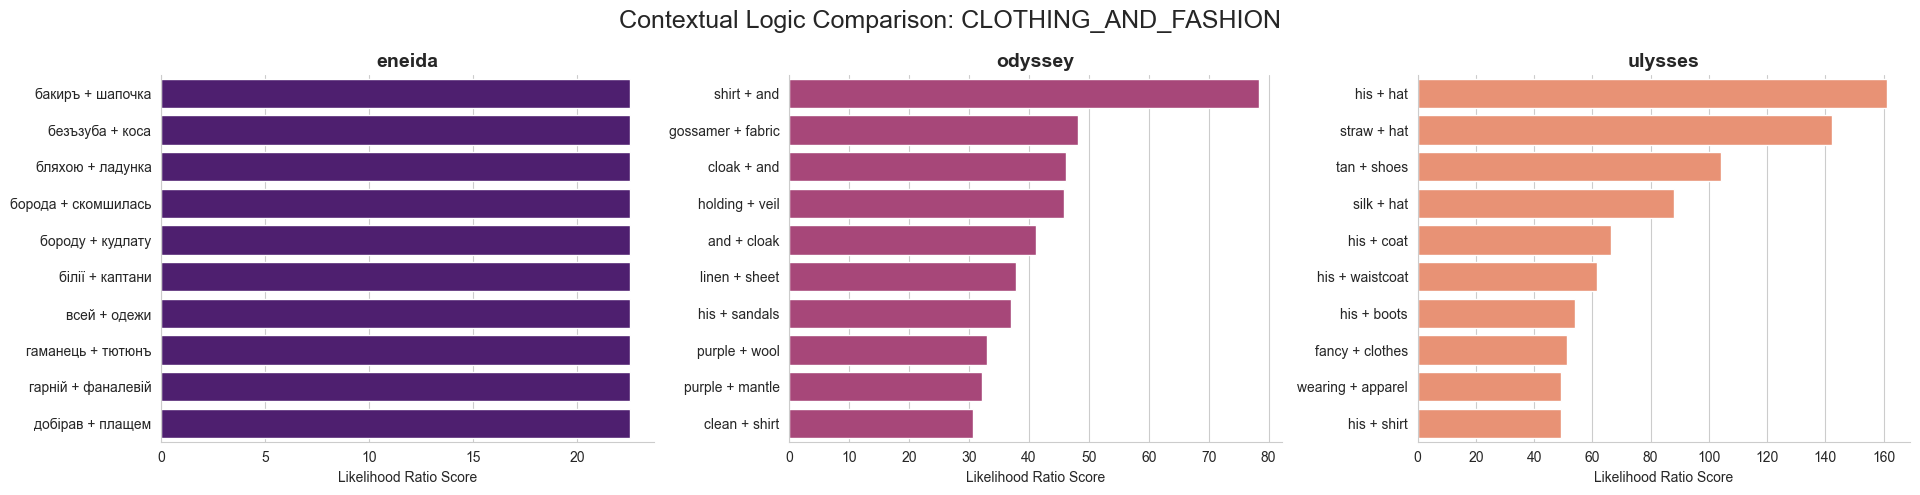

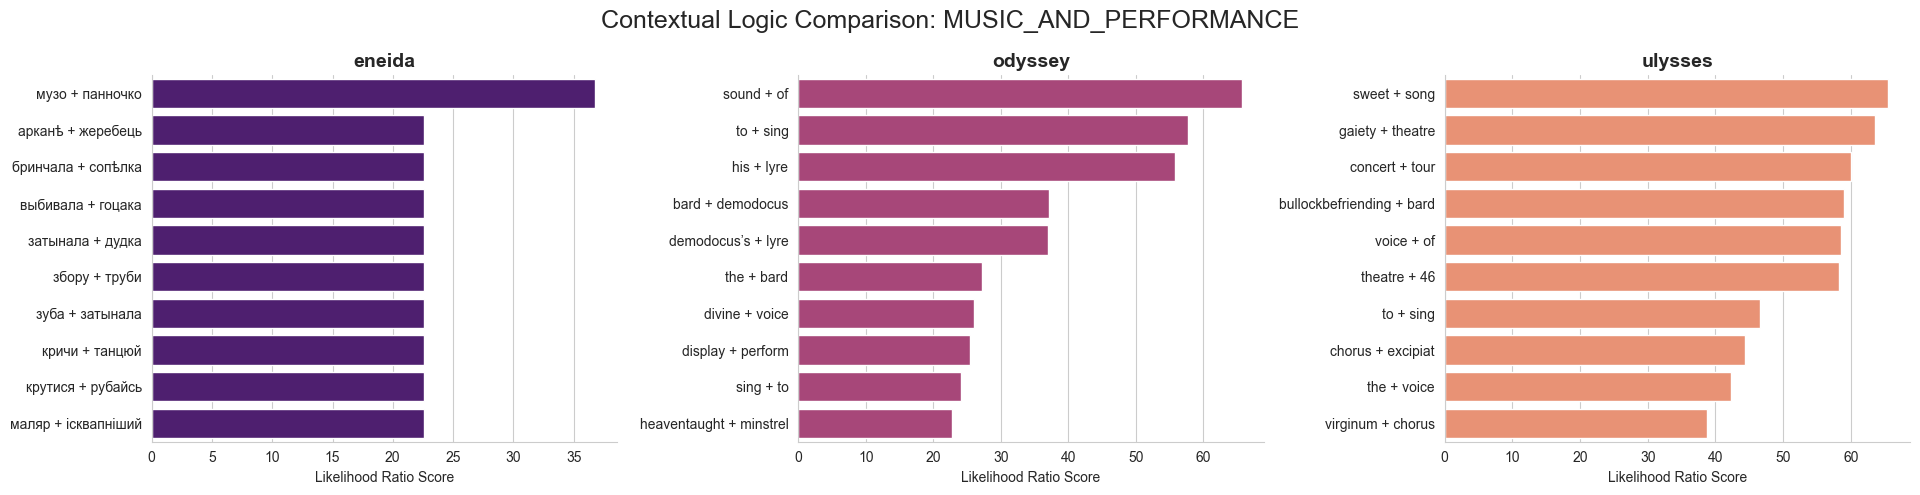

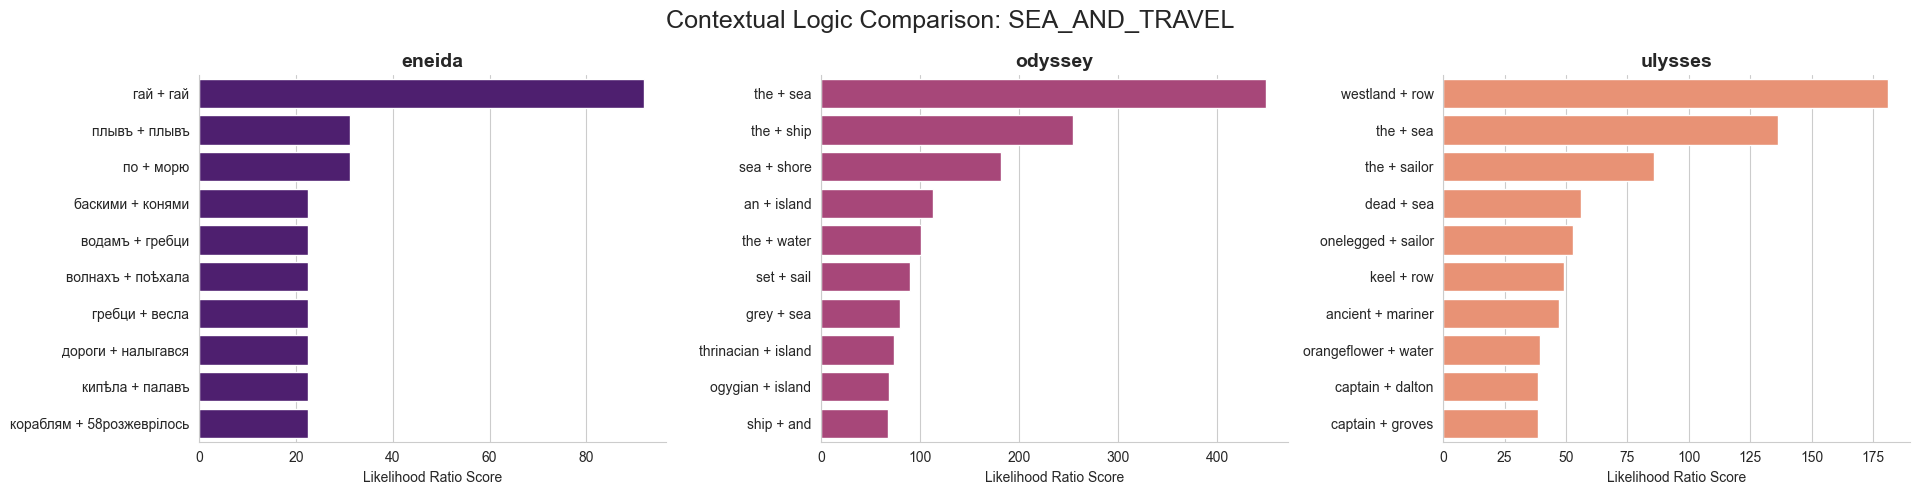

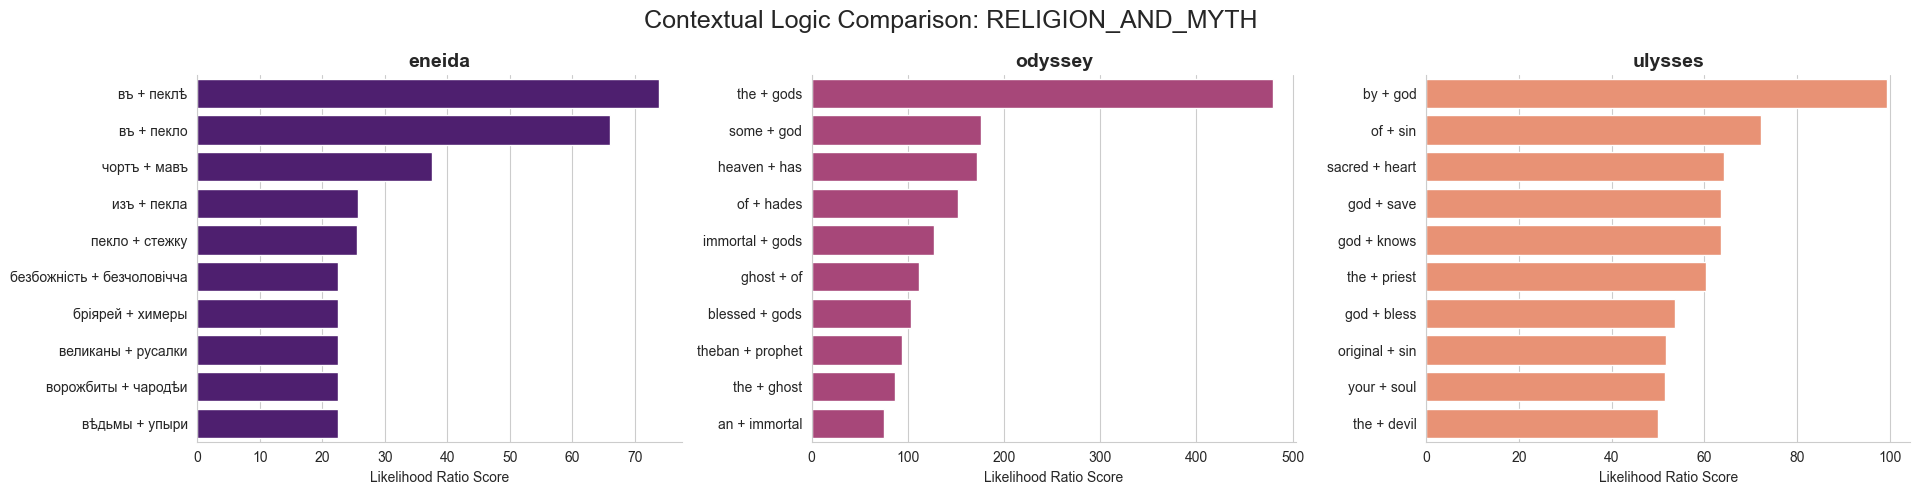

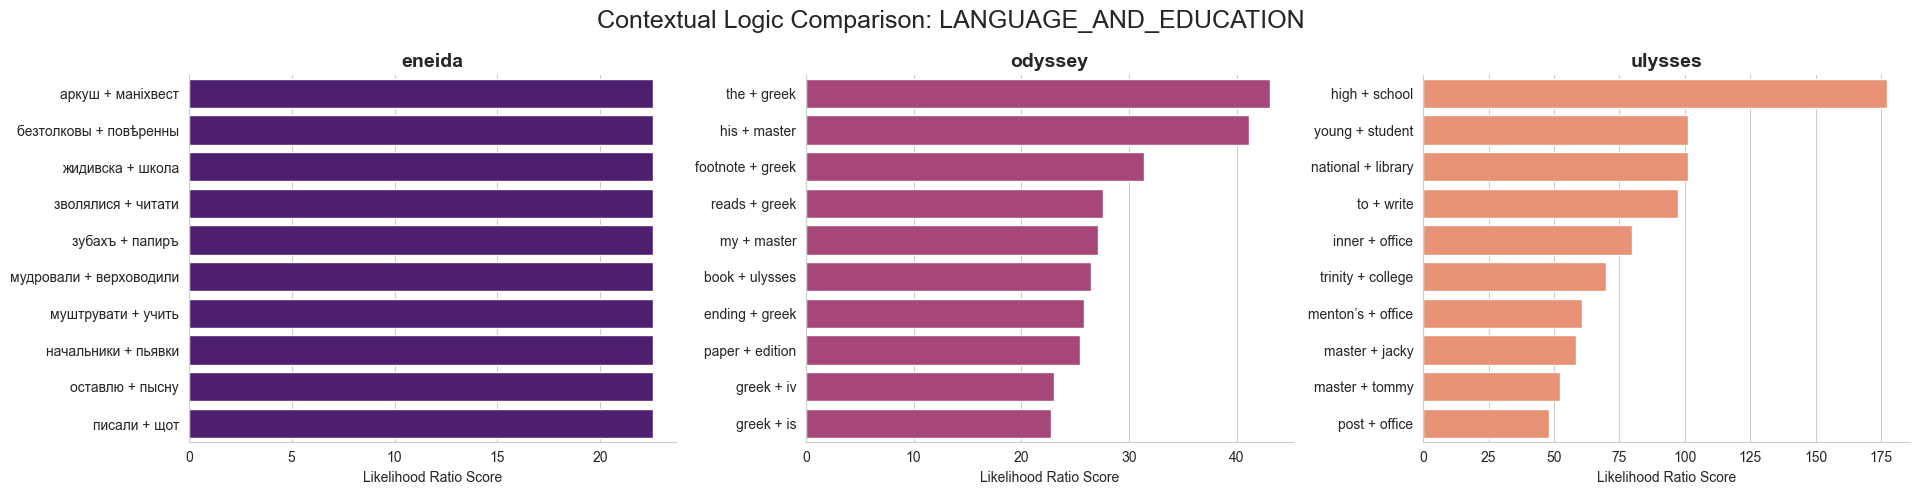

Generating Category Heatmaps...


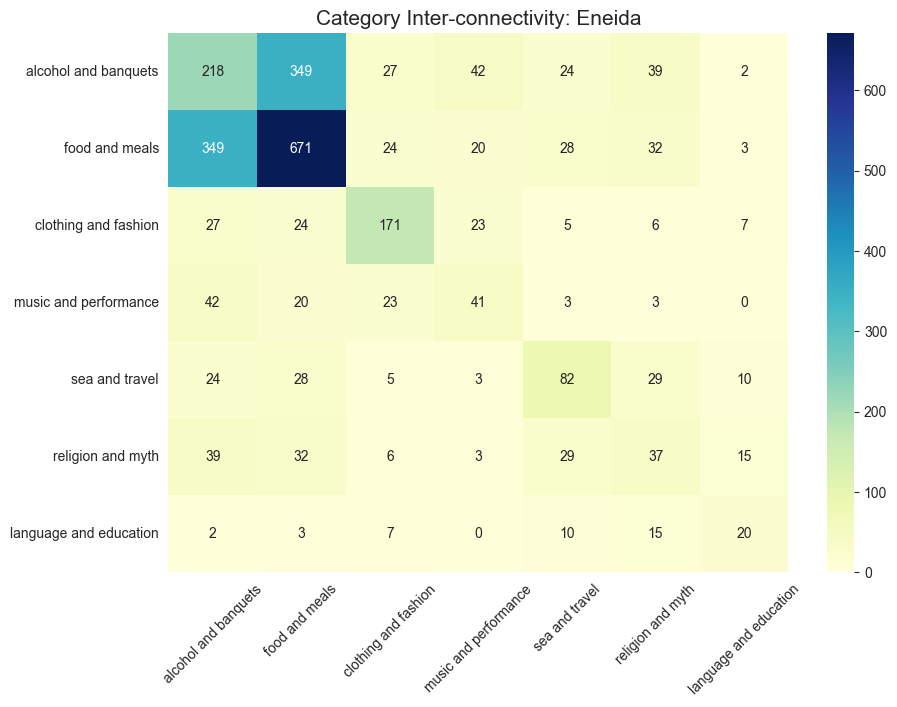

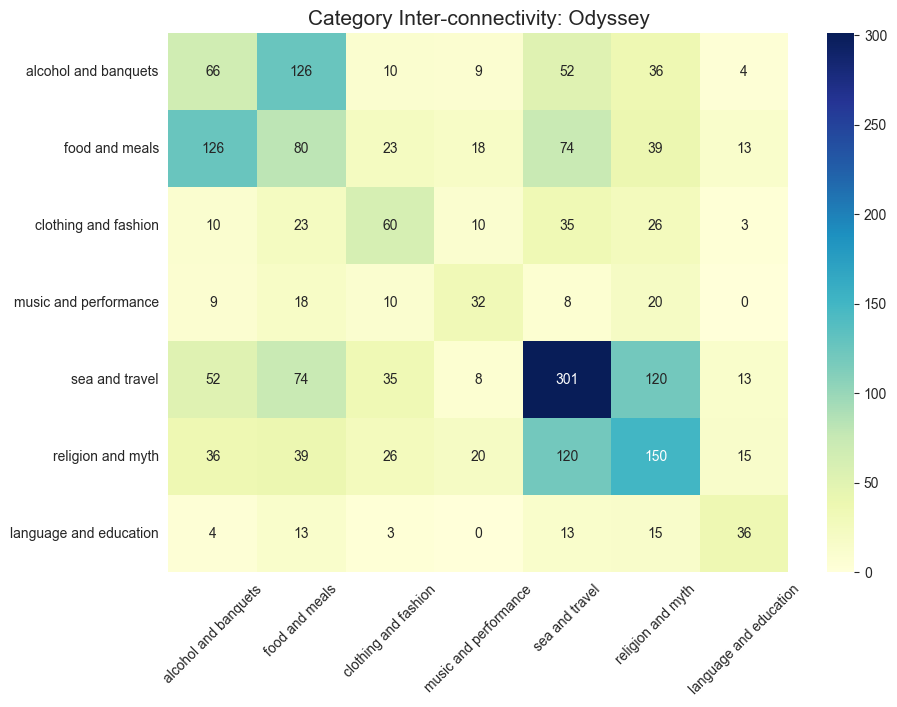

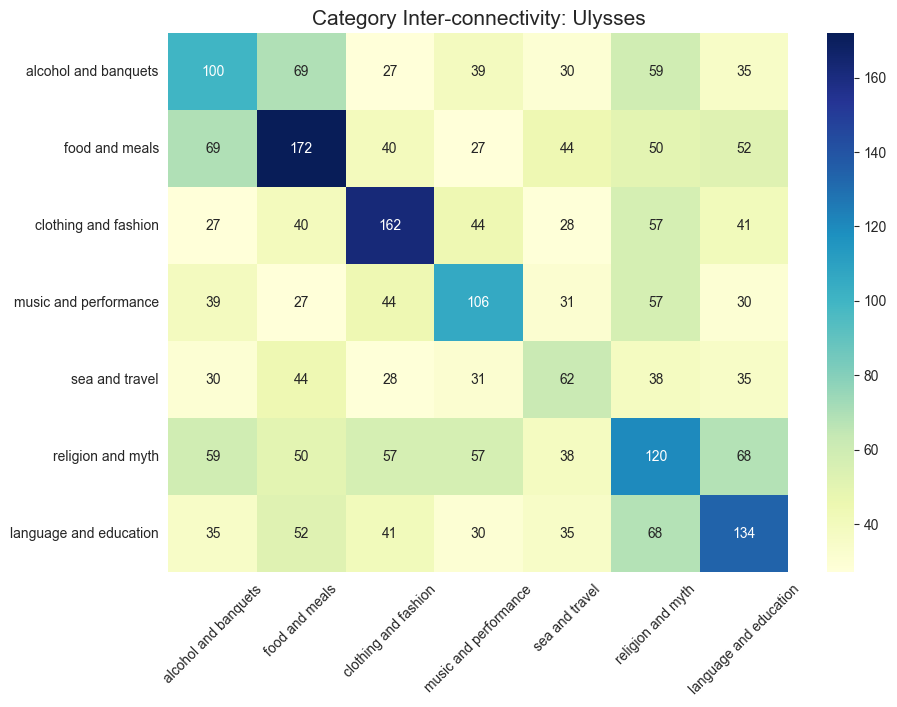

In [14]:
print("Generating Comparative Collocation Plots...")
for field in LEXICAL_FIELDS.keys():
    plot_comparative_collocations(df_colloc, field)

print("Generating Category Heatmaps...")
for name in ['eneida', 'odyssey', 'ulysses']:
    if name in tokens_by_text:
        raw_tokens = [t.lower() for t in tokens_by_text[name]]
        plot_category_heatmap(raw_tokens, LEXICAL_FIELDS, name)

### Interpretive Framework

The following interpretations are grounded in quantitative evidence
while remaining sensitive to literary form, genre, and historical context.
The aim is not to replace close reading, but to guide and enrich it.

## Final Analysis of Step 2.1: Semantic Structures (Based on Heatmap Data)
The visual evidence provided by the Category Heatmaps and Comparative Collocations allows for a data-driven re-evaluation of the thematic structures in each text.

### 1. Material Saturation in the Aeneid
The heatmap for the Aeneid shows significantly higher "heat" (numerical density) in the intersections between food_and_meals, alcohol_and_banquets, and clothing_and_fashion.
- Conclusion: For Kotlyarevsky, the material world is integrated. Words from these categories appear in very close proximity (within 10-15 tokens), creating a "thick" descriptive texture. This confirms the burlesque strategy of overwhelming the reader with sensory details of Ukrainian life.

### 2. Segmented Structure of the Odyssey
Contrary to traditional literary expectations, the heatmap for the Odyssey shows relatively low co-occurrence between religion_and_myth and alcohol_and_banquets within small text windows.
- Observation: While wine is used in rituals, Homer's narrative structure appears segmented. Rituals, battles, and feasts are described as distinct, orderly stages. The "cool" colors on the heatmap suggest that religious terminology and banquet terminology do not overlap constantly, but rather occupy their own specific sections of the epic.

### 3. Modernist Isolation in Ulysses
The heatmap for Ulysses demonstrates the lowest level of inter-category connectivity.
- Observation: Lexical fields appear as isolated "islands." This statistically reflects the modernist condition: objects (a piece of soap, a kidney, a hat) are perceived as fragments of a wandering mind rather than parts of a unified social ritual or a coherent epic world.

### 4. The "Density Gap" and Lexical Wealth
The Comparative Collocation plots show that Kotlyarevsky's scores for specific bigrams (e.g., сало + їли, горілка + пінна) are significantly higher than those in translation-based texts.
- This confirms that the Aeneid is built on lexical variety within narrow contexts. Kotlyarevsky doesn't just mention a category; he saturates a single scene with a high concentration of unique, specific terms that "cling" to each other, which is a hallmark of his original poetic style.



Differences in language and translation status are acknowledged; however, the analysis focuses on internal structural density rather than absolute frequency.